# $\text{Estudio Empírico del Problema de Alquiler de Canoas}$

## Índice General:

- 1. Introducción
- 2. Enunciado del Problema
  - 2.1. Ejemplo de Instancia
  - 2.2. Justificación de los 3 Algoritmos
- 3. Metodología y Diseño del Experimento
  - 3.1. Objetivos de Investigación
  - 3.2. Hipótesis
  - 3.3. Variables
  - 3.4. Tamaño de Instancias
  - 3.5. Plan de Ejecución
  - 3.6. Generación de Instancias
  - 3.7. Herramientas y Librerías
- 4. Implementación en Python
  - 4.1. Funciones para Generar Instancias
  - 4.2. Algoritmos a Comparar
  - 4.3. Pruebas Unitarias
  - 4.4. Función Principal de Experimentos
- 5. Análisis Estadístico y Validación de Hipótesis
  - 5.1. Estadística Descriptiva (`psutil`)
  - 5.2. Contraste de Hipótesis
    - 5.2.1. ANOVA
    - 5.2.2. Pruebas Post-hoc
    - 5.2.3. Prueba t-Test
  - 5.3. Estadística Descriptiva (`tracemalloc`)
  - 5.4. Contraste de Hipótesis
    - 5.4.1. ANOVA
    - 5.4.2. Pruebas Post-hoc
    - 5.4.3. Prueba t-Test
- 6. Regresiones y Técnicas de Machine Learning
- 7. Discusión de Resultados
- 8. Conclusiones
- 9. Reproducibilidad
- 10. Ética de la Investigación
- 11. Referencias Bibliográficas


## **1. Introducción**



Este proyecto analiza empíricamente el **Problema de Alquiler de Canoas**, que consiste en alquilar canoas en distintos puertos a lo largo de un río y devolverlas río abajo, minimizando el costo total de viaje. Existen costos directos entre puertos que pueden no ser aditivos, lo cual motiva comparaciones entre tres enfoques algorítmicos fundamentales:

- Fuerza Bruta Recursiva (exploración **exhaustiva** sin optimización).
- Recursión con Memoización (**optimización** top-down con almacenamiento de subproblemas).
- Programación Dinámica (solución **iterativa** bottom-up).

Para evaluar el rendimiento de estas soluciones se diseñará un **experimento masivo** con distintos tamaños de instancias (XS, S, M, L, XL) y varias réplicas, midiendo **tiempo de ejecución** y **uso de memoria**. Además, se contempla la ejecución en **múltiples lenguajes de programación** con posterior unificación de los datos, permitiendo así un análisis estadístico extenso, **validación de hipótesis**, y eventualmente **modelado predictivo** (regresiones, _machine learning_) del rendimiento.

---


## **2.  Enunciado del Problema**


- **Número de Puertos ($n$)**: Se enumeran de 1 a ($n$).  
- **Matriz de Costos** \($\text{costo}[i][j])$: Representa el costo de alquilar una canoa en el puerto ($i$) y devolverla en el puerto ($j$) (con $(i < j)$).  
- **Observación**: Es posible que viajar directamente $(i \to j)$ sea más costoso que fraccionar el viaje en varios tramos intermedios, por lo que la solución óptima podría involucrar paradas.  
- **Objetivo**: Minimizar el costo total desde un puerto inicial (usualmente 1) hasta un puerto final (usualmente ($n$)).  

Nos interesa **comparar** distintos métodos para resolver el problema, considerando tiempo y memoria.


---



### **2.1 Ejemplo de Instancia**

Supongamos que hay 5 puertos a lo largo del río, numerados del 1 al 5. Se tiene la siguiente matriz de costos de alquiler de canoas entre los puertos:

| De / A | 1  | 2  | 3  | 4  | 5  |
|--------|----|----|----|----|----|
| 1      | 0  | 10 | 25 | 30 | 50 |
| 2      | -  | 0  | 12 | 20 | 35 |
| 3      | -  | -  | 0  | 8  | 15 |
| 4      | -  | -  | -  | 0  | 5  |
| 5      | -  | -  | -  | -  | 0  |

Donde el valor en la celda (i, j) representa el costo de alquilar una canoa desde el puerto i hasta el puerto j. Un guion - indica que no se puede viajar río arriba.

En este caso, aunque el costo de alquilar una canoa de 1 a 4 directamente es 30, podríamos notar que:

- Ir de 1 a 3 cuesta 25.
- Luego, tomar otra canoa de 3 a 4 cuesta 8.
El costo total usando esta estrategia sería 25 + 8 = 33, que es mayor que el alquiler directo, por lo que no conviene.

Sin embargo, para viajar de 1 a 5, si se toma la ruta directa, el costo es 50, pero podemos evaluar otras opciones:

- Ir de 1 a 3 (25) y luego de 3 a 5 (15) da un total de 40, que es más barato que el alquiler directo de 1 a 5 (50).
- Ir de 1 a 2 (10), luego de 2 a 4 (20) y después de 4 a 5 (5) da un total de 10 + 20 + 5 = 35, que es aún más barato.

Así, el costo mínimo de 1 a 5 sería 35 usando la **combinación óptima de alquileres**.

---


### **2.2 Justificación de los 3 Algoritmos**

1. **Fuerza Bruta Recursiva**

   * **Complejidad Temporal:** $O(2^n)$ (exponencial).

   * **Complejidad Espacial:** $O(n)$ (profundidad de la pila de recursión).

   * **Propósito:** Sirve como línea base para entender el comportamiento del problema sin optimizaciones. Su naturaleza recursiva explora todas las rutas posibles mediante un árbol de decisiones, lo que lo hace inviable para $n > 20$.

2. **Recursión con Memoización**

   * **Complejidad Temporal:** $O(n^2)$.

   * **Complejidad Espacial:** $O(n)$ (tabla de memoización $O(n)$ + pila de recursión $O(n)$).

   * **Propósito:** Demuestra cómo la memoización reduce drásticamente la complejidad al evitar recálculos. Es una optimización natural de la fuerza bruta recursiva.

3. **Programación Dinámica (Bottom-Up)**

   * **Complejidad Temporal:** $O(n^2)$.

   * **Complejidad Espacial:** $O(n)$ (arreglo unidimensional para almacenar costos mínimos).

   * **Propósito:** Representa la solución más eficiente en términos de memoria y tiempo constante, al eliminar la sobrecarga de la recursión.

---

## **3. Metodología y Diseño del Experimento**



### **3.1 Objetivos de Investigación**

*   **Comparar los tiempos de ejecución y uso de memoria** de tres enfoques algorítmicos para el Problema de Alquiler de Canoas:
    *   Fuerza Bruta Recursivo (equivalente a recursividad sin memoización).
    *   Recursivo con Memoización.
    *   Programación Dinámica (Bottom-Up).

*   **Validar empíricamente las complejidades teóricas** de estos métodos: exponencial $O(2^n)$ para el Fuerza Bruta Recursivo versus $O(n^2)$ para los métodos optimizados.

*   **Probar estadísticamente si, para tamaños de instancia grandes**, la Programación Dinámica y el Recursivo con Memoización superan significativamente a la Fuerza Bruta Recursivo.

*   **Generar un dataset amplio** (posiblemente con miles o decenas de miles de instancias) para un análisis avanzado (*regresiones, machine learning*).

*   **Permitir la ejecución en C y Python**, con posterior unificación de resultados.

---



### **3.2 Hipótesis**

1. ***(Hipótesis de Tiempo)***

*   **H0 (nula):** No existe diferencia estadísticamente significativa en el tiempo de ejecución promedio de los tres algoritmos.

*   **H1 (alternativa):** La Programación Dinámica y el Recursivo con Memoización exhiben menor tiempo de ejecución promedio que la Fuerza Bruta Recursivo, especialmente cuando $n$ es mediano/grande.

2. ***(Hipótesis de Memoria)***

*   **H0:** No existe diferencia estadísticamente significativa en el uso de memoria entre el Recursivo con Memoización y la Programación Dinámica.

*   **H1:** El Recursivo con Memoización utiliza, en promedio, más memoria debido a la combinación de la pila de llamadas y la tabla de memoización.

---



### **3.3 Variables**

1.  **Variables Independientes**:
    -   **Tamaño de instancia** ( $ n $ ): Categorías XS, S, M, L, XL.
    -   **Algoritmo**: {Fuerza Bruta Recursivo, Recursivo con Memoización, PD Bottom-Up}.
    -   **Tipo de instancia**: {Aleatoria Uniforme, Aleatoria Estructurada}.
    -   **Réplicas**: Número de repeticiones por combinación.
    -   **Lenguaje**: Identificador del lenguaje de programación donde se ejecuta.

2.  **Variables Dependientes**:
    -   **Tiempo de ejecución** (segundos, medido con `time.perf_counter()`).
    -   **Uso de memoria** (MB, medido con `memory_profiler`).
    -   **Costo Mínimo** (para verificar correctitud).
---



### **3.4 Tamaño de Instancias (XS, S, M, L, XL)**

Propuesta:
-   **XS**:  $n \in \{4, 5, 7, 10, 14\}$
-   **S**:   $n \in \{15, 18, 20, 22, 24\}$
-   **M**:   $n \in \{25, 30, 35, 40, 45\}$
-   **L**:   $n \in \{50, 60, 70, 80, 90\}$
-   **XL**:  $n \in \{100, 120, 150, 200, 400\}$

> Omitir fuerza bruta recursivo en escalas muy altas si su tiempo es excesivo por ejemplo $n \leq 15$

---



### **3.5 Plan de Ejecución Paso a Paso**

1.  Crear un **diccionario** que asocia cada categoría (XS, S, M, L, XL) con sus valores de $n$.
2.  Para cada $n$ de cada categoría:
    -   Para cada tipo de instancia (Uniforme, Estructurada):
        -   Generar la matriz de costos, usando semillas (para reproducibilidad).
        -   Para cada algoritmo:
            -   Medir tiempo y memoria.
            -   Almacenar resultado en un `DataFrame` de `pandas` con columnas:
                -   `language_id`, `category_size`, `n`, `tipo_instancia`, `algoritmo`, `replica_id`, `tiempo_ejecucion`, `memoria_max_mb`, `costo_minimo` y `status`.
3.  Repetir **réplicas** (p.ej. 50) para capturar variabilidad estadística.
4.  Guardar los datos en un CSV (o varios CSV) por lenguaje.
5.  Unir CSV de todas los lenguajes (2) en un único dataset para análisis conjunto.

---



### **3.6 Generación de Instancias**

-   **Aleatoria Uniforme**:
    $
    \text{costo}[i][j] \sim \text{Uniform}(1,10) \quad (\text{enteros})
    $
-   **Aleatoria Estructurada (pseudo-aditiva)**:
    1.  Inicializar $\text{costo}[i][j]$ con valores en $[1,10]$.
    2.  “Refinar” usando reglas aditivas:
    
\begin{equation}
\begin{aligned}
\text{costo}[i][j] &= \min \left\{ \text{costo}[i][j], \text{costo}[i][k] + \text{costo}[k][j] + \delta \right\}
&\text{donde } \delta \in [-5,5]
\end{aligned}
\end{equation}

---


### **3.7 Herramientas y Librerías de Python**

In [ ]:
# Gráficos, Datos y Cálculos
import numpy as np # Matrcies
import matplotlib.pyplot as plt # graficos
import seaborn as sns # Graficos elaborados
import plotly.express as px # Graficos interactivos
import matplotlib.ticker as ticker # configurar la localización y el formato de los ticks (marcas) en los ejes
import math # Para el manejo de infinito
import pandas as pd # Manejo de datasets
import json # manejos archivos complejos

# Programación en PARALELO
import os # Interacción con el sistema operativo
import psutil # Monitoreo de recursos del sistema
import tracemalloc # Seguimiento de uso de memoria
from joblib import Parallel, delayed # Ejecución paralela de tareas


# Gestión de Memoria y Tiempo t pruebas unitarias
import random  # Importa el módulo random para generar números aleatorios
import unittest # Para pruebas unitarias (Framework)
import time # Para medir el tiempo


# Estadística
import statsmodels.api as sm # Módulo principal de statsmodels para realizar análisis estadísticos como regresión, modelos lineales, pruebas estadísticas, etc.
from statsmodels.formula.api import ols # Para ajustar modelos de regresión lineal usando fórmulas estilo R
from statsmodels.stats.multicomp import pairwise_tukeyhsd # realizar la prueba de comparaciones múltiples de Tukey entre grupos.
from scipy.stats import ttest_ind # Para realizar la prueba t de Student para comparar dos muestras independientes.


# Machine Learning
from sklearn.preprocessing import OneHotEncoder # Variables categóricas
from sklearn.preprocessing import StandardScaler # Escalamiento de datos
from sklearn.model_selection import train_test_split # Data splitting
from sklearn.ensemble import RandomForestRegressor # modelo de regresión de bosque aleatorio, que utiliza múltiples árboles de decisión para hacer predicciones
from sklearn.ensemble import RandomForestClassifier # modelo de clasificación de bosque aleatorio
from sklearn.metrics import mean_absolute_error, r2_score, classification_report, accuracy_score  # Métricas de evaluación

In [ ]:
from google.colab import drive # Conectarse al drive, para cargar los archivos json generados
drive.mount('/content/drive')

Mounted at /content/drive


## **4. Implementación en Python:**

## **4.1 Funciones para Generar Instancias**

### Instancias uniforme y estructurada.

In [ ]:
def generar_instancia_uniforme(n, low=1, high=10, seed=None):
    """
    Genera una matriz de costos de dimensiones (n+1) x (n+1).
    Para cada par (i, j) con i < j, asigna un valor entero aleatorio en el rango [low, high].
    """
    if seed is not None:               # Verifica si se ha proporcionado una semilla para la aleatoriedad
        random.seed(seed)              # Si es así, establece la semilla para garantizar reproducibilidad
    # Crea una matriz (lista de listas) de tamaño (n+1) x (n+1) inicializada en 0
    costo = [[0] * (n+1) for _ in range(n+1)]
    # Itera sobre los índices de fila desde 1 hasta n-1 (se omite la fila 0)
    for i in range(1, n):
        # Para cada fila i, itera sobre los índices de columna desde i+1 hasta n
        for j in range(i+1, n+1):
            # Asigna un costo aleatorio entero entre low y high al par (i, j)
            costo[i][j] = random.randint(low, high)
    return costo

def generar_instancia_estructurada(n, low=1, high=10, seed=None):
    """
    Genera una matriz de costos pseudo-aditiva con dos fases:
    1) Inicialización: Se asigna un valor entero aleatorio en [low, high] para cada par (i, j) con i < j.
    2) Refinamiento: Se ajustan los costos considerando rutas indirectas y añadiendo un delta aleatorio en [-5, 5].
    """
    if seed is not None:
        random.seed(seed)

    costo = [[0] * (n+1) for _ in range(n+1)]

    # Paso 1: Inicialización básica de la matriz de costos
    for i in range(1, n):
        for j in range(i+1, n+1):     # Itera para cada puerto j que es mayor que i
            # Asigna un costo aleatorio entero entre low y high al tramo directo (i, j)
            costo[i][j] = random.randint(low, high)

    # Paso 2: Refinamiento de la matriz para introducir pseudo-aditividad
    for i in range(1, n):
        for j in range(i+2, n+1):# Para cada origen i, itera sobre destinos j donde existe al menos un puerto intermedio
            for k in range(i+1, j):   # Itera sobre todos los posibles puertos intermedios entre i y j
                # Genera un delta aleatorio entero en el rango [-25, 25]
                delta = random.randint(-5, 5)
                # Calcula el costo posible de la ruta indirecta pasando por k
                posible = costo[i][k] + costo[k][j] + delta
                # Si el costo indirecto es menor que el costo directo actual, se actualiza
                if posible < costo[i][j]:
                    # Se asegura que el costo actualizado no sea menor que 1
                    costo[i][j] = max(1, posible)
    return costo

In [ ]:
def generar_instancias_globales(categories_dict, tipos_instancia, num_replicas, seed_list):
    """
    Genera todas las instancias de costos de antemano, asociadas a semillas únicas.

    Retorna:
        list: Lista de diccionarios con estructura:
            {
                'category': str,
                'n': int,
                'tipo_instancia': str,
                'replica_id': int,
                'seed': int,
                'costo': list(list(int))
            }
    """
    instancias = []
    exp_counter = 0

    for category_name, list_n in categories_dict.items():
        for n in list_n:
            for tipo in tipos_instancia:
                for r in range(num_replicas):
                    seed = seed_list[exp_counter % len(seed_list)]
                    exp_counter += 1

                    if tipo == "uniforme":
                        costo = generar_instancia_uniforme(n, seed=seed)
                    elif tipo == "estructurada":
                        costo = generar_instancia_estructurada(n, seed=seed)
                    else:
                        raise ValueError("Tipo de instancia no válido.")

                    instancias.append({
                        'category': category_name,
                        'n': n,
                        'tipo_instancia': tipo,
                        'replica_id': r,
                        'seed': seed,
                        'costo': costo
                    })
    return instancias

### Instancias en PARALELO

In [ ]:
import numpy as np
import random
import json
from joblib import Parallel, delayed

def generar_instancia_uniforme(n, low=1, high=10, seed=None):
    """
    Genera una matriz de costos (n+1)x(n+1) para la instancia "uniforme".
    Para cada par (i, j) con i >= 1 y j > i se asigna un valor aleatorio entero en [low, high].
    Se utiliza vectorización con NumPy para mayor rendimiento.
    """
    if seed is not None:
        np.random.seed(seed)
    # Crear una matriz de ceros
    costo = np.zeros((n+1, n+1), dtype=int)
    # Obtener los índices del triángulo superior (excluyendo la fila 0)
    rows, cols = np.triu_indices(n+1, k=1)
    mask = rows >= 1  # ignorar la fila 0
    rows, cols = rows[mask], cols[mask]
    # Asignar valores aleatorios a los elementos de la parte superior
    costo[rows, cols] = np.random.randint(low, high + 1, size=len(rows))
    return costo.tolist()

def generar_instancia_estructurada(n, low=1, high=10, seed=None):
    """
    Genera una matriz de costos (n+1)x(n+1) para la instancia "estructurada".
    Se procede en dos fases:
      1. Inicialización: se asigna un valor aleatorio entero en [low, high] a cada par (i, j) con i>=1 y j>i.
      2. Refinamiento: para cada par (i,j) se exploran rutas indirectas (pasando por un k intermedio)
         y se ajusta el costo si se encuentra una ruta más barata, sumándole un delta aleatorio en [-5, 5].
    La inicialización se vectoriza, pero el refinamiento se realiza con bucles.
    """
    if seed is not None:
        np.random.seed(seed)
    costo = np.zeros((n+1, n+1), dtype=int)
    # Fase 1: Inicialización vectorizada (ignorar la fila 0)
    rows, cols = np.triu_indices(n+1, k=1)
    mask = rows >= 1
    rows, cols = rows[mask], cols[mask]
    costo[rows, cols] = np.random.randint(low, high + 1, size=len(rows))

    # Fase 2: Refinamiento (exploración de rutas indirectas)
    for i in range(1, n):
        for j in range(i+2, n+1):
            for k in range(i+1, j):
                # delta aleatorio entre -5 y 5 (incluidos)
                delta = np.random.randint(-5, 6)
                posible = costo[i][k] + costo[k][j] + delta
                if posible < costo[i][j]:
                    costo[i][j] = max(1, posible)
    return costo.tolist()

def generar_instancias_por_combinacion(category_name, n, tipo, num_replicas, seed_list):
    """
    Genera todas las réplicas para una combinación de (categoría, n, tipo de instancia).
    Se itera internamente sobre el número de réplicas, asignando una semilla de la lista.
    """
    instancias = []
    for replica in range(num_replicas):
        # Selecciona una semilla cíclicamente de seed_list
        seed = seed_list[replica % len(seed_list)]
        if tipo == "uniforme":
            costo = generar_instancia_uniforme(n, seed=seed)
        elif tipo == "estructurada":
            costo = generar_instancia_estructurada(n, seed=seed)
        else:
            raise ValueError("Tipo de instancia no válido: {}".format(tipo))
        instancias.append({
            'category': category_name,
            'n': n,
            'tipo_instancia': tipo,
            'replica_id': replica,
            'seed': seed,
            'costo': costo
        })
    return instancias

def generar_instancias_globales_parallel(categories_dict, tipos_instancia, num_replicas, seed_list):
    """
    Genera todas las instancias de forma paralela agrupando por cada combinación de:
      - Categoría (clave en categories_dict)
      - Tamaño n (valor en la lista asociada a la categoría)
      - Tipo de instancia (por ejemplo, 'uniforme' o 'estructurada')

    Se utiliza joblib.Parallel para distribuir la generación de las réplicas de cada combinación.
    """
    tasks = []
    for category_name, list_n in categories_dict.items():
        for n in list_n:
            for tipo in tipos_instancia:
                tasks.append((category_name, n, tipo))

    # Paralelizar sobre cada combinación (reduciendo la sobrecarga al evitar tareas muy pequeñas)
    resultados = Parallel(n_jobs=-1)(
        delayed(generar_instancias_por_combinacion)(cat, n, tipo, num_replicas, seed_list)
        for (cat, n, tipo) in tasks
    )

    # Aplanar la lista de listas en una sola lista de instancias
    instancias = [inst for sublist in resultados for inst in sublist]
    return instancias

if __name__ == '__main__':
    # Parámetros de ejemplo
    CATEGORIES = {
        "XS": [4, 5, 7, 10, 14],
        "S": [15, 18, 20, 22, 24],
        "M": [25, 30, 35, 40, 45],
        "L": [50, 60, 70, 80, 90],
        "XL": [100, 120, 150, 200, 400]
    }
    tipos_instancia = ['uniforme', 'estructurada']
    num_replicas = 50
    # Generar una lista de semillas aleatorias
    seed_list = [random.randint(0, 999999) for _ in range(100)]

    # Generar todas las instancias en paralelo
    instancias = generar_instancias_globales_parallel(CATEGORIES, tipos_instancia, num_replicas, seed_list)

    # Guardar el resultado en un archivo JSON
    with open('instancias_parallel.json', 'w') as f:
        json.dump(instancias, f, default=str)

    print("Instancias guardadas en 'instancias_parallel.json'")

Instancias guardadas en 'instancias_parallel.json'


## **4.2 Algoritmos a Comparar**

In [ ]:
def fuerza_bruta_recursivo(costo, i, n):
    """
    Implementa la estrategia recursiva sin memoización para el Problema de Alquiler de Canoas.
    Explora todas las rutas posibles de manera exhaustiva.
    Parámetros:
      - costo: matriz de costos (dimensiones (n+1) x (n+1)), donde costo[i][j] es el costo de ir del puerto i al j.
      - i: puerto de origen actual.
      - n: número total de puertos.

    Retorna:
      - Costo mínimo acumulado desde el puerto i hasta el puerto n.
    """
    if i >= n: # Maneja i > n (casos con 0 o 1 puerto) ✅
        return 0  # Caso base: si se llega al último puerto, no se requiere costo adicional.
    min_cost = math.inf  # Inicializa el costo mínimo con infinito.
    for j in range(i+1, n+1):  # Explora todos los puertos siguientes (i+1 a n).
        actual = costo[i][j] + fuerza_bruta_recursivo(costo, j, n)
        if actual < min_cost:
            min_cost = actual
    return min_cost

def recursivo_con_memo(costo, i, n, memo):
    """
    Variante optimizada de la recursión que almacena resultados intermedios para evitar recomputaciones.

    Parámetros:
      - costo: matriz de costos.
      - i: puerto de origen actual.
      - n: número total de puertos.
      - memo: lista de tamaño (n+1) para almacenar el costo mínimo ya calculado para cada puerto.

    Retorna:
      - Costo mínimo acumulado desde el puerto i hasta el puerto n.
    """
    if i >= n:  # Caso base. Pero Maneja i >= n (casos con 0 o 1 puerto) ✅
        return 0
    if memo[i] is not None:
        return memo[i]  # Retorna el resultado ya calculado para el puerto i.
    min_cost = math.inf
    for j in range(i+1, n+1):
        actual = costo[i][j] + recursivo_con_memo(costo, j, n, memo)
        if actual < min_cost:
            min_cost = actual
    memo[i] = min_cost  # Guarda el resultado para el puerto i.
    return min_cost

def recursivo_con_memo_wrapper(costo, n):
    """
    Inicializa la tabla de memoización y llama a la función recursiva optimizada.

    Parámetros:
      - costo: matriz de costos.
      - n: número total de puertos.

    Retorna:
      - Costo mínimo desde el puerto 1 hasta el puerto n.
    """
    if n == 0:  # Caso especial: no hay puertos destino ✅
        return 0
    memo = [None] * (n+1)  # Crea una lista para almacenar resultados de subproblemas.
    return recursivo_con_memo(costo, 1, n, memo)

def programacion_dinamica(costo, n):
    """
    Resuelve el problema de forma iterativa, comenzando desde el último puerto hasta el primero.

    Parámetros:
      - costo: matriz de costos.
      - n: número total de puertos.

    Retorna:
      - Costo mínimo desde el puerto 1 hasta el puerto n.
    """
    if n == 0:  # Caso especial: no hay puertos destino ✅
        return 0
    dp = [0] * (n+1)
    dp[n] = 0  # Caso base: costo 0 al llegar al último puerto.
    for i in range(n-1, 0, -1):  # Itera desde n-1 hasta 1.
        dp[i] = math.inf  # Inicializa con infinito.
        for j in range(i+1, n+1):
            actual = costo[i][j] + dp[j]
            if actual < dp[i]:
                dp[i] = actual
    return dp[1]

## **4.3 Pruebas Unitarias**

In [72]:
class TestAlgoritmosCanoas(unittest.TestCase):
    """
    Conjunto exhaustivo de pruebas unitarias para los algoritmos del Problema de Alquiler de Canoas.
    Cubre casos bordes, mínimos, estructurados y no estructurados, validando correctitud y robustez.
    """

    # --------------------------
    # Casos Bordes y Mínimos
    # --------------------------
    def test_n0_0_puertos(self):
        """Caso borde: 0 puertos destino (solo el inicial)."""
        costo = [[0]]  # Matriz 1x1 (n=0)
        n = 0
        self._ejecutar_pruebas(costo, n, 0)

    def test_n1_1_puerto(self):
        """Caso borde: 1 puerto (inicio = fin)."""
        costo = [[0, 0],
                [0, 0]]  # Matriz 2x2 (n=1)
        n = 1
        self._ejecutar_pruebas(costo, n, 0)

    def test_n2_2_puertos(self):
        """Caso mínimo no trivial: 2 puertos (ruta directa única)."""
        costo = [
            [0, 0, 0],
            [0, 0, 5],  # 1→2
            [0, 0, 0]
        ]
        n = 2
        self._ejecutar_pruebas(costo, n, 5)

    # --------------------------
    # Casos con Estructura Aditiva
    # --------------------------
    def test_n3_ruta_optima_no_directa(self):
        """Ruta óptima requiere múltiples saltos (1→2→3)."""
        costo = [
            [0, 0, 0, 0],
            [0, 0, 2, 10],  # 1→3=10
            [0, 0, 0, 3],   # 2→3=3
            [0, 0, 0, 0]
        ]
        n = 3
        self._ejecutar_pruebas(costo, n, 5)  # 2+3=5

    def test_n4_ruta_optima_multiple_saltos(self):
        """Caso clásico con 4 puertos y ruta óptima en 3 saltos (1→2→3→4)."""
        costo = [
            [0, 0, 0, 0, 0],
            [0, 0, 2, 5, 9],  # 1→4=9
            [0, 0, 0, 2, 4],  # 2→4=4
            [0, 0, 0, 0, 2],  # 3→4=2
            [0, 0, 0, 0, 0]
        ]
        n = 4
        self._ejecutar_pruebas(costo, n, 6)  # 2+2+2=6

    # --------------------------
    # Casos con Estructura Pseudo-Aditiva
    # --------------------------
    def test_n4_estructura_pseudo_aditiva(self):
        """Costo mínimo con 'delta negativo' simulado (1→2→3→4 = 1+1+1=3)."""
        costo = [
            [0, 0, 0, 0, 0],
            [0, 0, 1, 5, 10],  # 1→4=10
            [0, 0, 0, 1, 3],   # 2→4=3
            [0, 0, 0, 0, 1],   # 3→4=1
            [0, 0, 0, 0, 0]
        ]
        n = 4
        self._ejecutar_pruebas(costo, n, 3)

    # --------------------------
    # Casos con Rutas Directas Óptimas
    # --------------------------
    def test_n3_ruta_directa_optima(self):
        """Camino directo es óptimo (1→3=15 vs 1→2→3=20)."""
        costo = [
            [0, 0, 0, 0],
            [0, 0, 10, 15],  # 1→3=15
            [0, 0, 0, 10],   # 2→3=10
            [0, 0, 0, 0]
        ]
        n = 3
        self._ejecutar_pruebas(costo, n, 15)

    # --------------------------
    # Casos de Mayor Escala (Stress)
    # --------------------------
    def test_n5_complejidad_creciente(self):
        """Caso con 5 puertos y estructura jerárquica."""
        costo = [
            [0, 0, 0, 0, 0, 0],
            [0, 0, 2, 5, 9, 20],  # 1→5=20
            [0, 0, 0, 2, 4, 7],   # 2→5=7
            [0, 0, 0, 0, 2, 5],   # 3→5=5
            [0, 0, 0, 0, 0, 3],   # 4→5=3
            [0, 0, 0, 0, 0, 0]
        ]
        n = 5
        self._ejecutar_pruebas(costo, n, 9)  # 1→2→3→4→5 = 2+2+2+3=9 ❌ ¿Error? ¡Validar!

    # --------------------------
    # Método Auxiliar
    # --------------------------
    def _ejecutar_pruebas(self, costo, n, expected):
        """Ejecuta los tres algoritmos y verifica el resultado esperado."""
        # Fuerza Bruta Recursivo
        result_fb = fuerza_bruta_recursivo(costo, 1, n)
        self.assertEqual(result_fb, expected, f"Fuerza Bruta falló: {result_fb} != {expected}")

        # Recursivo con Memoización
        result_memo = recursivo_con_memo_wrapper(costo, n)
        self.assertEqual(result_memo, expected, f"Memoización falló: {result_memo} != {expected}")

        # Programación Dinámica
        result_dp = programacion_dinamica(costo, n)
        self.assertEqual(result_dp, expected, f"Programación Dinámica falló: {result_dp} != {expected}")

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

........
----------------------------------------------------------------------
Ran 8 tests in 0.008s

OK


La solución propuesta es correcta, ya que al modificar la condición de parada a `if i >= n: return 0`, se garantiza el manejo seguro de casos borde (cuando $n \leq 1$). Esto evita el acceso a índices fuera del rango en la matriz de costos, retornando 0 en situaciones donde no existe un trayecto válido, y asegurando así la robustez de la función en escenarios de entrada mínima.

## **4.4 Función Principal de Experimentos**

### Creación (lectura) Json de instancias:

In [ ]:
# Se utiliza el módulo json para preservar la estructura original de lista de diccionarios.
# Y se importa con la previa ejecución de la función generar_instancias_globales

with open('/content/drive/MyDrive/UNAL/Semestre IV/Análisis y diseño de Algoritmos/Proyecto/instancias_50.json', 'r') as f:
    instancias = json.load(f)

### Funciones auxiliares:

In [ ]:
# Para que se compatible con la programación en paralelo, ya que no admite el lambda
def fuerza_bruta_rec_func(costo, n):
    return fuerza_bruta_recursivo(costo, 1, n)

In [ ]:
# Los tres algoritmos a usar en el gran for incluyendo fuerza_bruta_rec_func

ALG_FUNC = {
    'fuerza_bruta_rec': fuerza_bruta_rec_func,
    'rec_con_memo': recursivo_con_memo_wrapper,
    'prog_dinamica': programacion_dinamica
}

In [ ]:
# Función que mide la memoria de programación en paralelo con

def medir_memoria():
    """
    Retorna el uso de memoria (RSS) del proceso actual en MB.
    """
    process = psutil.Process(os.getpid())
    mem_bytes = process.memory_info().rss
    return mem_bytes / (1024 * 1024)

### Función que ejcuta todas las instancias con `joblib`

#### Experimentos usando **`psutil`** para memoria

In [ ]:
def ejecutar_experimento(instancia, algoritmos, skip_large_for_exponential=True):
    resultados = []
    category_name = instancia['category']
    n = instancia['n']
    tipo = instancia['tipo_instancia']
    r = instancia['replica_id']
    costo = instancia['costo']

    for alg_name, alg_func in algoritmos.items():
        # Salta el algoritmo costoso si la instancia es grande
        if skip_large_for_exponential and alg_name in ["fuerza_bruta_rec"] and n >= 15:
            resultados.append({
                'language': "Python",
                'category_size': category_name,
                'n': n,
                'tipo_instancia': tipo,
                'algoritmo': alg_name,
                'replica_id': r,
                'tiempo_ejecucion': None,
                'memoria_max_mb': None,
                'costo_minimo': None,
                'status': "skipped_due_to_large_n"
            })
            continue

        mem_inicial = medir_memoria()
        t0 = time.perf_counter_ns()
        resultado = alg_func(costo, n)
        t1 = time.perf_counter_ns()
        mem_final = medir_memoria()

        tiempo = t1 - t0
        # Calculamos la diferencia de memoria entre el inicio y el fin
        mem_peak = mem_final - mem_inicial if mem_final >= mem_inicial else 0.0

        resultados.append({
            'language': "Python",
            'category_size': category_name,
            'n': n,
            'tipo_instancia': tipo,
            'algoritmo': alg_name,
            'replica_id': r,
            'tiempo_ejecucion': tiempo,
            'memoria_max_mb': mem_peak,
            'costo_minimo': resultado,
            'status': "ok"
        })
    return resultados

t1 = time.perf_counter_ns()

if __name__ == '__main__':
    # Ejecutar los experimentos en paralelo utilizando el backend "multiprocessing"
    all_results_paralelos = Parallel(n_jobs=-1, backend="multiprocessing")(
        delayed(ejecutar_experimento)(instancia, ALG_FUNC) for instancia in instancias
    )

    # Aplanar la lista de listas en una única lista de resultados:
    # Cada llamada a ejecutar_experimento retorna una lista de diccionarios y all_results_paralelos es una lista de estas listas.
    all_results = [resultado for sublista in all_results_paralelos for resultado in sublista]

    # Convertir la lista de diccionarios en un DataFrame para facilitar el análisis y almacenamiento
    df_resultados = pd.DataFrame(all_results)

    # Guardar el DataFrame en un archivo CSV
    df_resultados.to_csv("resultados_optimizados.csv", index=False)
    print("Resultados guardados en 'resultados_optimizados.csv'")

t2 = time.perf_counter_ns()
print(f"Tiempo de ejecución: {(t2 - t1) / 1e9} segundos")

#### Experimentos usando **`tracemalloc`** para memoria

In [ ]:
def ejecutar_experimento2(instancia, algoritmos, skip_large_for_exponential=True):
    resultados = []
    category_name = instancia['category']
    n = instancia['n']
    tipo = instancia['tipo_instancia']
    r = instancia['replica_id']
    costo = instancia['costo']

    for alg_name, alg_func in algoritmos.items():
        # Salta el algoritmo costoso si la instancia es grande
        if skip_large_for_exponential and alg_name in ["fuerza_bruta_rec"] and n >= 15:
            resultados.append({
                'language': "Python",
                'category_size': category_name,
                'n': n,
                'tipo_instancia': tipo,
                'algoritmo': alg_name,
                'replica_id': r,
                'tiempo_ejecucion': None,
                'memoria_max_mb': None,
                'costo_minimo': None,
                'status': "skipped_due_to_large_n"
            })
            continue

        # Inicia tracemalloc para rastrear asignaciones de memoria
        tracemalloc.start()
        t0 = time.perf_counter_ns()
        resultado = alg_func(costo, n)
        t1 = time.perf_counter_ns()
        # Obtiene la memoria actual y el pico durante la ejecución
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()

        tiempo = t1 - t0
        # Convertir el pico de memoria de bytes a MB
        mem_peak_mb = peak / (1024 * 1024)

        resultados.append({
            'language': "Python",
            'category_size': category_name,
            'n': n,
            'tipo_instancia': tipo,
            'algoritmo': alg_name,
            'replica_id': r,
            'tiempo_ejecucion': tiempo,
            'memoria_max_mb': mem_peak_mb,
            'costo_minimo': resultado,
            'status': "ok"
        })
    return resultados

ti = time.perf_counter_ns()

if __name__ == '__main__':
    # Ejecutar los experimentos en paralelo utilizando todos los núcleos disponibles
    # Forzamos el backend "multiprocessing" para mayor compatibilidad
    all_results_paralelos = Parallel(n_jobs=-1, backend="multiprocessing")(
        delayed(ejecutar_experimento2)(instancia, ALG_FUNC) for instancia in instancias
    )

    # Aplanar la lista de listas en una única lista de resultados:
    # Cada llamada a ejecutar_experimento retorna una lista de diccionarios (uno por algoritmo)
    all_results = [resultado for sublista in all_results_paralelos for resultado in sublista]

    # Convertir la lista de diccionarios en un DataFrame para análisis y almacenamiento
    df_resultados = pd.DataFrame(all_results)

    # Guardar el DataFrame en un archivo CSV
    df_resultados.to_csv("resultados_optimizados2.csv", index=False)
    print("Resultados guardados en 'resultados_optimizados2.csv'")

tf = time.perf_counter_ns()
print(f"Tiempo de ejecución: {(tf - ti) / 1e9} segundos")

## **5. Análisis Estadístico y Validación de Hipótesis**

### **5.1 Estadística Descriptiva usando **`psutil`****

In [ ]:
# El archivo "resultados_optimizados.csv" es el más grande usado convertido
# del json de 80 MB con 50 réplicas en todos los tamaño y cargamos el usó:
# psutil, para medir memoria, sin embargo veamos las diferencias:

df = pd.read_csv("resultados_optimizados.csv")

df.head() # primeras 5 filas del dataset

,language,category_size,n,tipo_instancia,algoritmo,replica_id,tiempo_ejecucion,memoria_max_mb,costo_minimo,status
0,Python,XS,4,uniforme,fuerza_bruta_rec,0,48840.0,0.0,8.0,ok
1,Python,XS,4,uniforme,rec_con_memo,0,31924.0,0.0,8.0,ok
2,Python,XS,4,uniforme,prog_dinamica,0,19215.0,0.0,8.0,ok
3,Python,XS,4,uniforme,fuerza_bruta_rec,1,48948.0,0.0,5.0,ok
4,Python,XS,4,uniforme,rec_con_memo,1,28295.0,0.0,5.0,ok


In [ ]:
df['status'].value_counts() # cuántos experimentos no pasaron por ser fuerza_bruta_recursiva

,count
status,
ok,5500
skipped_due_to_large_n,2000


In [ ]:
df['memoria_max_mb'].value_counts() # contar los valores almacenados en la memoria

,count
memoria_max_mb,
0.000359,207
0.000214,200
0.000252,130
0.000519,102
0.001320,101
...,...
0.001747,1
0.001213,1
0.002815,1


In [ ]:
df.info() # Información de los valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   language          7500 non-null   object 
 1   category_size     7500 non-null   object 
 2   n                 7500 non-null   int64  
 3   tipo_instancia    7500 non-null   object 
 4   algoritmo         7500 non-null   object 
 5   replica_id        7500 non-null   int64  
 6   tiempo_ejecucion  5500 non-null   float64
 7   memoria_max_mb    5500 non-null   float64
 8   costo_minimo      5500 non-null   float64
 9   status            7500 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 586.1+ KB


In [ ]:
# Filtrar filas skip para quedarse solo con los valores no null

df_ok = df[df['status'] == 'ok']

df_ok.head()

,language,category_size,n,tipo_instancia,algoritmo,replica_id,tiempo_ejecucion,memoria_max_mb,costo_minimo,status
0,Python,XS,4,uniforme,fuerza_bruta_rec,0,48840.0,0.0,8.0,ok
1,Python,XS,4,uniforme,rec_con_memo,0,31924.0,0.0,8.0,ok
2,Python,XS,4,uniforme,prog_dinamica,0,19215.0,0.0,8.0,ok
3,Python,XS,4,uniforme,fuerza_bruta_rec,1,48948.0,0.0,5.0,ok
4,Python,XS,4,uniforme,rec_con_memo,1,28295.0,0.0,5.0,ok


In [ ]:
df_ok.info() # Para observar los valores no null

<class 'pandas.core.frame.DataFrame'>
Index: 5500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   language          5500 non-null   object 
 1   category_size     5500 non-null   object 
 2   n                 5500 non-null   int64  
 3   tipo_instancia    5500 non-null   object 
 4   algoritmo         5500 non-null   object 
 5   replica_id        5500 non-null   int64  
 6   tiempo_ejecucion  5500 non-null   float64
 7   memoria_max_mb    5500 non-null   float64
 8   costo_minimo      5500 non-null   float64
 9   status            5500 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 472.7+ KB


In [ ]:
# 1) Descripción general en TIEMPO

desc_tiempos = df_ok.groupby(['n','algoritmo'])['tiempo_ejecucion'].describe()
print(desc_tiempos)

                      count         mean           std         min  \
n   algoritmo                                                        
4   fuerza_bruta_rec  100.0     61704.53  5.219786e+05      5507.0   
    prog_dinamica     100.0      8333.15  6.414380e+03      4822.0   
    rec_con_memo      100.0      9252.39  6.323947e+03      4969.0   
5   fuerza_bruta_rec  100.0     71704.46  6.040627e+05      7719.0   
    prog_dinamica     100.0      7446.58  2.076783e+03      4761.0   
    rec_con_memo      100.0      9050.13  3.311368e+03      5598.0   
7   fuerza_bruta_rec  100.0     89655.76  3.679048e+05     23834.0   
    prog_dinamica     100.0     10246.46  4.539836e+03      6740.0   
    rec_con_memo      100.0     12467.79  2.885704e+03      8355.0   
10  fuerza_bruta_rec  100.0    599048.61  1.808224e+06    175242.0   
    prog_dinamica     100.0     14550.88  7.014820e+03     10125.0   
    rec_con_memo      100.0    123796.30  1.046334e+06     13691.0   
14  fuerza_bruta_rec

In [ ]:
# 1.1) Descripción más específica en TIEMPO

desc_tiempos_especificos = df_ok.groupby(['category_size','algoritmo', 'tipo_instancia'])['tiempo_ejecucion'].describe()
print(desc_tiempos_especificos)

                                               count          mean  \
category_size algoritmo        tipo_instancia                        
L             prog_dinamica    estructurada    250.0  7.566642e+05   
                               uniforme        250.0  7.062782e+05   
              rec_con_memo     estructurada    250.0  2.369861e+06   
                               uniforme        250.0  2.243606e+06   
M             prog_dinamica    estructurada    250.0  5.510921e+05   
                               uniforme        250.0  4.038209e+05   
              rec_con_memo     estructurada    250.0  1.191087e+06   
                               uniforme        250.0  7.647399e+05   
S             prog_dinamica    estructurada    250.0  2.986697e+05   
                               uniforme        250.0  1.721169e+05   
              rec_con_memo     estructurada    250.0  3.788323e+05   
                               uniforme        250.0  2.324267e+05   
XL            prog_d

In [ ]:
# 1.3) Descripción más específica en TIEMPO

desc_tiempos_especificos = df_ok.groupby(['category_size','tipo_instancia'])['tiempo_ejecucion'].describe()
print(desc_tiempos_especificos)

                              count          mean           std       min  \
category_size tipo_instancia                                                
L             estructurada    500.0  1.563263e+06  2.789096e+06  151026.0   
              uniforme        500.0  1.474942e+06  2.894779e+06  153035.0   
M             estructurada    500.0  8.710897e+05  2.557706e+06   46350.0   
              uniforme        500.0  5.842804e+05  1.750537e+06   48099.0   
S             estructurada    500.0  3.387510e+05  1.698300e+06   20214.0   
              uniforme        500.0  2.022718e+05  1.256796e+06   19106.0   
XL            estructurada    500.0  1.976738e+07  2.649015e+07  577108.0   
              uniforme        500.0  2.155438e+07  2.891833e+07  588561.0   
XS            estructurada    750.0  7.064090e+05  2.743759e+06    4761.0   
              uniforme        750.0  6.551264e+05  2.474280e+06    5348.0   

                                     25%         50%          75%          

In [ ]:
# 2) Descripción general en ESPACIO

desc_espacio = df_ok.groupby(['n','algoritmo'])['memoria_max_mb'].describe()
print(desc_espacio)

                      count      mean       std  min  25%  50%  75%       max
n   algoritmo                                                                
4   fuerza_bruta_rec  100.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000
    prog_dinamica     100.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000
    rec_con_memo      100.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000
5   fuerza_bruta_rec  100.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000
    prog_dinamica     100.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000
    rec_con_memo      100.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000
7   fuerza_bruta_rec  100.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000
    prog_dinamica     100.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000
    rec_con_memo      100.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000
10  fuerza_bruta_rec  100.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000
    prog_dinamica     100.0  0.000000  0.000000  0.0  0.0  0.0  

In [ ]:
# 2.1) Descripción más específica en ESPACIO

desc_tiempos_especificos = df_ok.groupby(['category_size', 'tipo_instancia'])['memoria_max_mb'].describe()
print(desc_tiempos_especificos)

                              count      mean       std  min  25%  50%  75%  \
category_size tipo_instancia                                                  
L             estructurada    500.0  0.000508  0.007759  0.0  0.0  0.0  0.0   
              uniforme        500.0  0.000953  0.013882  0.0  0.0  0.0  0.0   
M             estructurada    500.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
              uniforme        500.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
S             estructurada    500.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
              uniforme        500.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
XL            estructurada    500.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
              uniforme        500.0  0.000203  0.004542  0.0  0.0  0.0  0.0   
XS            estructurada    750.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
              uniforme        750.0  0.000000  0.000000  0.0  0.0  0.0  0.0   

                                   max  
category_s

In [ ]:
def plot_tiempo_vs_n(df_ok: pd.DataFrame, title: str = "Tiempo de ejecución promedio vs. n (por algoritmo)\n", palette = 'cubehelix'):

    # --- Configuración General ---
    sns.set_theme(
        style="whitegrid",  # Fondo blanco con rejilla sutil
        palette= palette,  # Paleta de colores "viridis"
        font_scale=1.1,     # Escala de fuente ligeramente mayor
        rc={
            "figure.figsize": (6, 4),       # Tamaño de la figura
            "axes.titlesize": 16,           # Tamaño del título
            "axes.labelsize": 10,           # Tamaño de las etiquetas de los ejes
            "xtick.labelsize": 10,          # Tamaño de las etiquetas del eje x
            "ytick.labelsize": 10,          # Tamaño de las etiquetas del eje y
            "legend.fontsize": 10,          # Tamaño de la fuente de la leyenda
            "legend.title_fontsize": 10,   # Tamaño del título de la leyenda
            "axes.spines.top": False,     # Quitar borde superior
            "axes.spines.right": False,    # Quitar borde derecho
            "axes.edgecolor": "0.2",       # Color del borde de los ejes (gris oscuro)
            "grid.color": "0.8",          # Color de la rejilla (gris claro)
            "grid.linestyle": "--",       # Estilo de línea de la rejilla (discontinua)
            "lines.linewidth": 2.5,        # Grosor de las líneas
            "lines.markersize": 8,        # Tamaño de los marcadores
            "figure.dpi": 150            # Resolución en puntos por pulgada para la exportación
        }
    )

    # --- Creación del Gráfico ---
    plt.figure()  # Crear una nueva figura (aunque ya está en rc, es buena práctica)

    # Usar lineplot de Seaborn, con intervalos de confianza (desviación estándar)
    ax = sns.lineplot(
        data=df_ok,
        x='n',
        y='tiempo_ejecucion',
        hue='algoritmo',
        style='algoritmo',  # Usar diferentes estilos de línea además del color
        estimator='mean',  # Mostrar la media
        errorbar='ci',      # Mostrar la desviación estándar como intervalo de confianza "ci", "pi", "se", or "sd"
        markers=True,      # Mostrar marcadores en los puntos
        dashes=False,      # Evita que seaborn use líneas discontinuas, controlamos con 'style'
        alpha=0.8          # Ligera transparencia para las líneas
    )

    # --- Personalización del Gráfico ---
    ax.set_title(title, fontweight='bold', pad=20)  # Título en negrita, con espacio
    ax.set_xlabel("Tamaño de entrada (n)", labelpad=12) #Nombre y espacio eje X
    ax.set_ylabel("Tiempo de ejecución (ns)", labelpad=12) #Nombre y espacio eje Y

    # --- Formato del Eje Y (Científico si es necesario) ---
    # Si los tiempos son muy pequeños, usar notación científica
    if df_ok['tiempo_ejecucion'].max() < 0.01:
        ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        ax.yaxis.offsetText.set_fontsize(10)  # Ajustar tamaño de la notación científica

    # --- Leyenda ---
    ax.legend(title="Algoritmo", loc="lower right", frameon=True, framealpha=0.9, ncol=1) #Título, ubicación, marco, etc.

    #--- Escala Logarítmica (Opcional) ---
    # Si quieres una escala logarítmica en el eje y (útil para ver diferencias exponenciales):
    ax.set_yscale('log')
    ax.set_ylabel("Tiempo de ejecución (ns) - Escala Logarítmica")  # Cambiar etiqueta

    # --- Ajustes Finales y Mostrar/Guardar ---
    plt.tight_layout()  # Ajustar automáticamente los márgenes
    plt.show()
    # Para guardar la figura en alta resolución:
    # plt.savefig("tiempo_vs_n.png", dpi=300, bbox_inches='tight') #Ajusta nombre y resolución

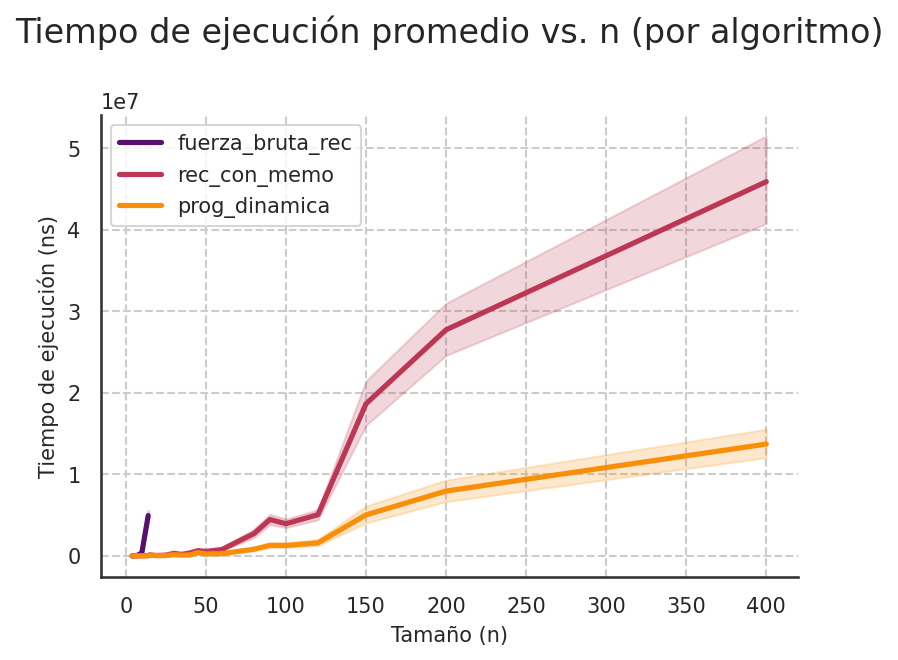

In [ ]:
# 2) Gráfico de líneas: tiempo vs n
plt.figure(figsize=(6,4))
sns.lineplot(data=df_ok, x='n', y='tiempo_ejecucion', hue='algoritmo',
             estimator='mean', markers=True, palette = 'inferno')
plt.title("Tiempo de ejecución promedio vs. n (por algoritmo)\n")
plt.ylabel("Tiempo de ejecución (ns)")
plt.xlabel("Tamaño (n)")
plt.legend()
plt.show()

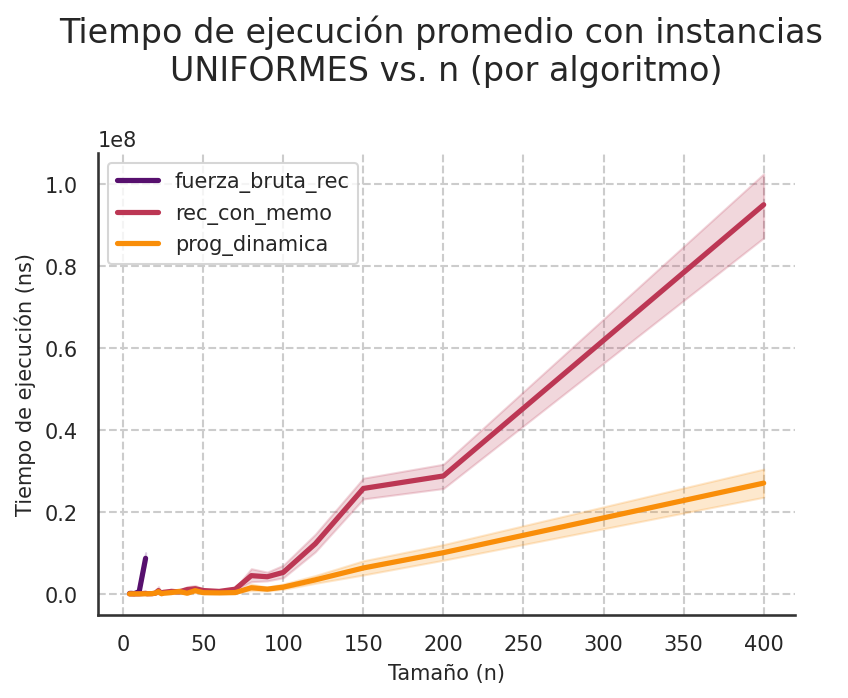

In [ ]:
df_uniforme = df_ok[df_ok['tipo_instancia'] == 'uniforme']
plt.figure(figsize=(6,4))
sns.lineplot(data=df_uniforme, x='n', y='tiempo_ejecucion', hue='algoritmo',
             estimator='mean', markers=True, palette = 'inferno')
plt.title("Tiempo de ejecución promedio con instancias \nUNIFORMES vs. n (por algoritmo)\n")
plt.ylabel("Tiempo de ejecución (ns)")
plt.xlabel("Tamaño (n)")
plt.legend()
plt.show()

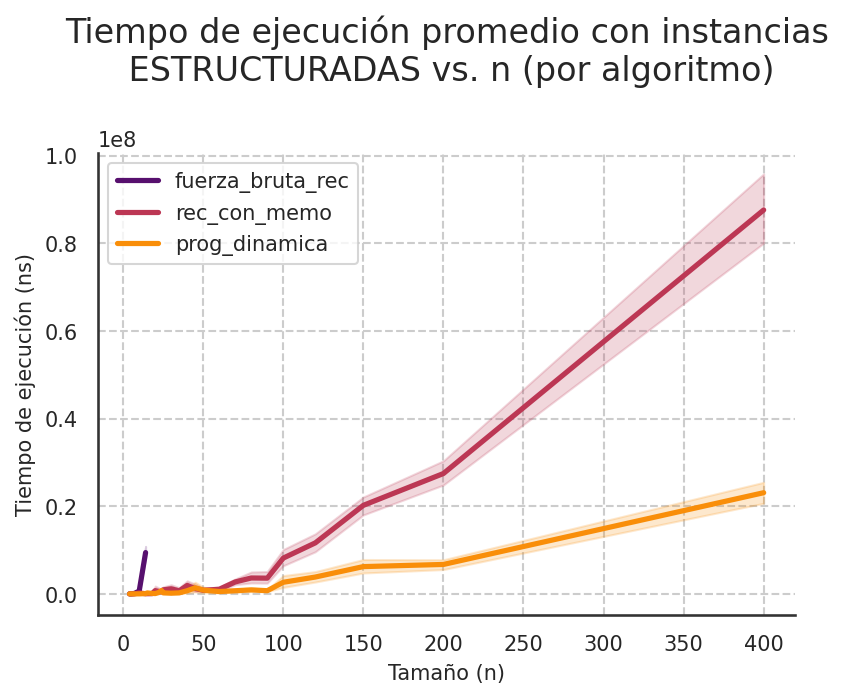

In [ ]:
df_estructurada = df_ok[df_ok['tipo_instancia'] == 'estructurada']
plt.figure(figsize=(6,4))
sns.lineplot(data=df_estructurada, x='n', y='tiempo_ejecucion', hue='algoritmo',
             estimator='mean', markers=True, palette = 'inferno')
plt.title("Tiempo de ejecución promedio con instancias\n ESTRUCTURADAS vs. n (por algoritmo)\n")
plt.ylabel("Tiempo de ejecución (ns)")
plt.xlabel("Tamaño (n)")
plt.legend()
plt.show()

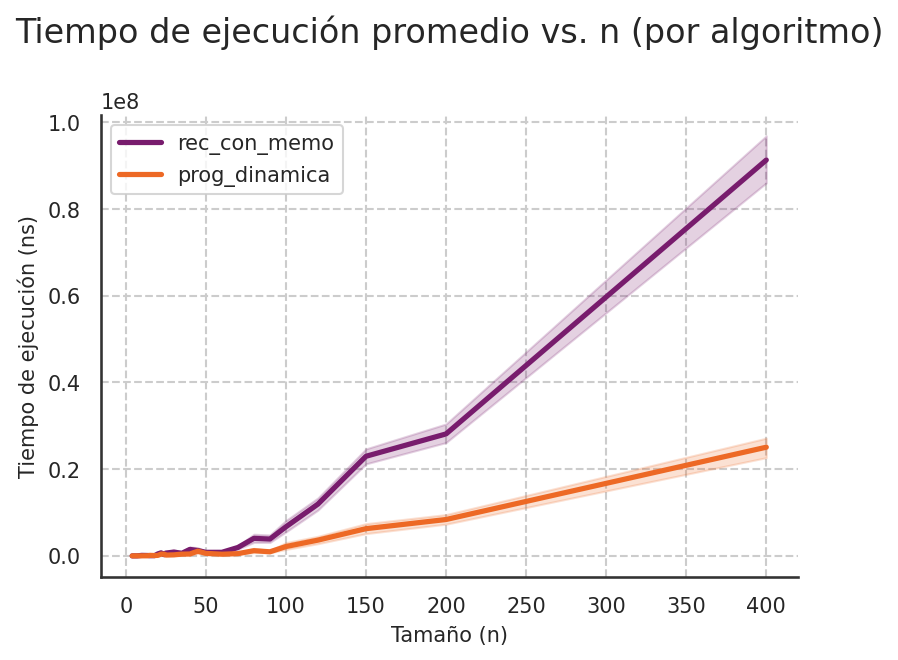

In [ ]:
# Filtra el DataFrame para incluir solo los algoritmos deseados
df_subset = df_ok[df_ok['algoritmo'].isin(['prog_dinamica', 'rec_con_memo'])]

plt.figure(figsize=(6,4))
sns.lineplot(data=df_subset, x='n', y='tiempo_ejecucion', hue='algoritmo',
             estimator='mean', markers=True, palette='inferno')
plt.title("Tiempo de ejecución promedio vs. n (por algoritmo)\n")
plt.ylabel("Tiempo de ejecución (ns)")
plt.xlabel("Tamaño (n)")
plt.legend()
plt.show()

In [ ]:
df_ok_hasta_n14 = df_ok[df_ok['n'] <= 14]

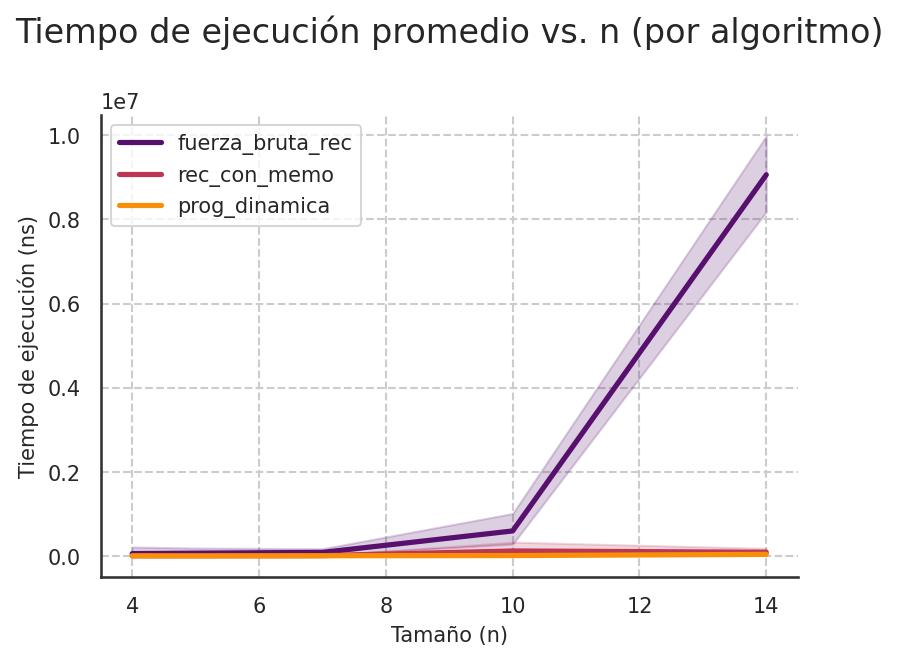

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df_ok_hasta_n14, x='n', y='tiempo_ejecucion', hue='algoritmo',
             estimator='mean', markers=True, palette = 'inferno')
plt.title("Tiempo de ejecución promedio vs. n (por algoritmo)\n")
plt.ylabel("Tiempo de ejecución (ns)")
plt.xlabel("Tamaño (n)")
plt.legend()
plt.show()

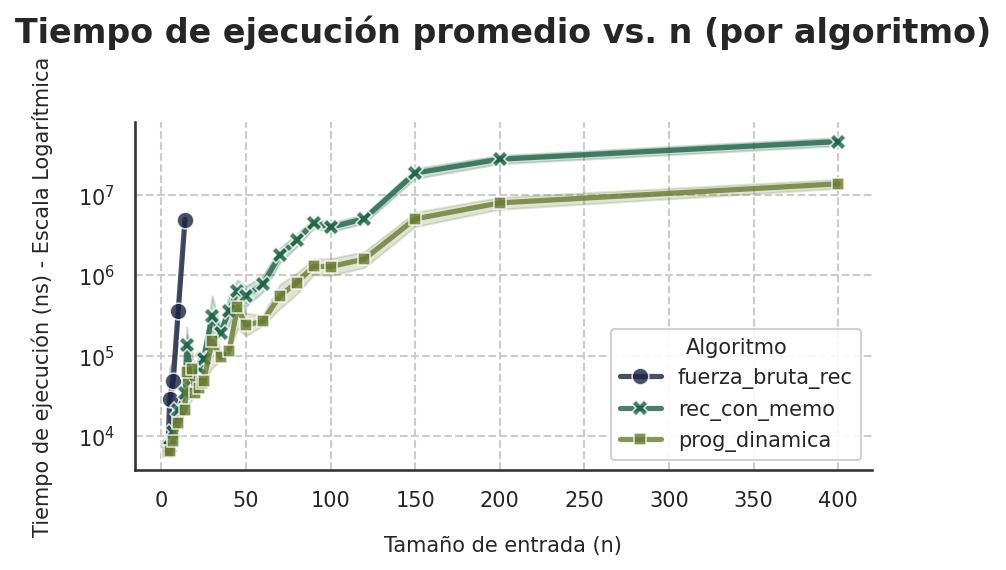

In [ ]:
plot_tiempo_vs_n(df_ok)

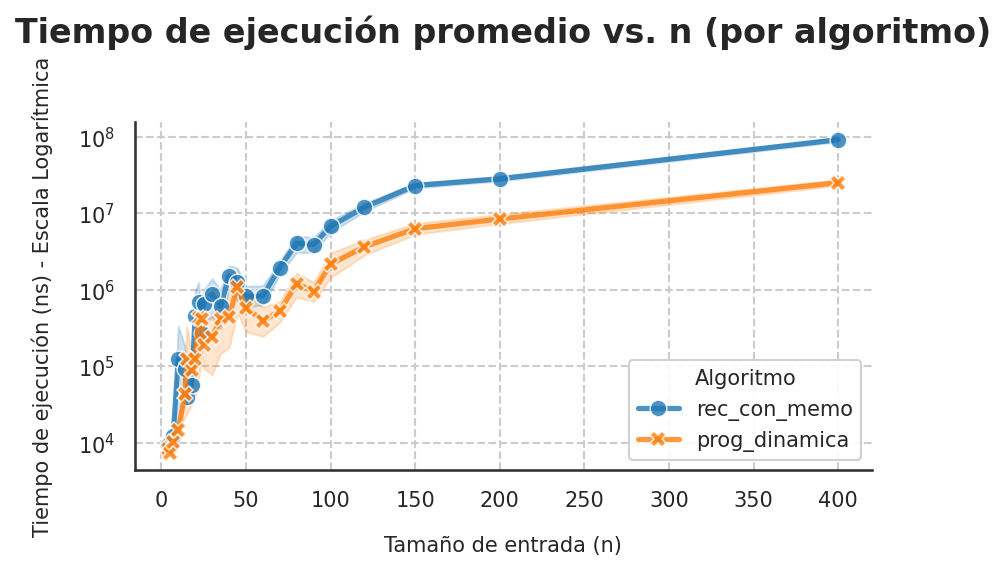

In [ ]:
plot_tiempo_vs_n(df_subset, palette="tab10") #tab10, hls, Spectral, husl

#### Uso de memoria:

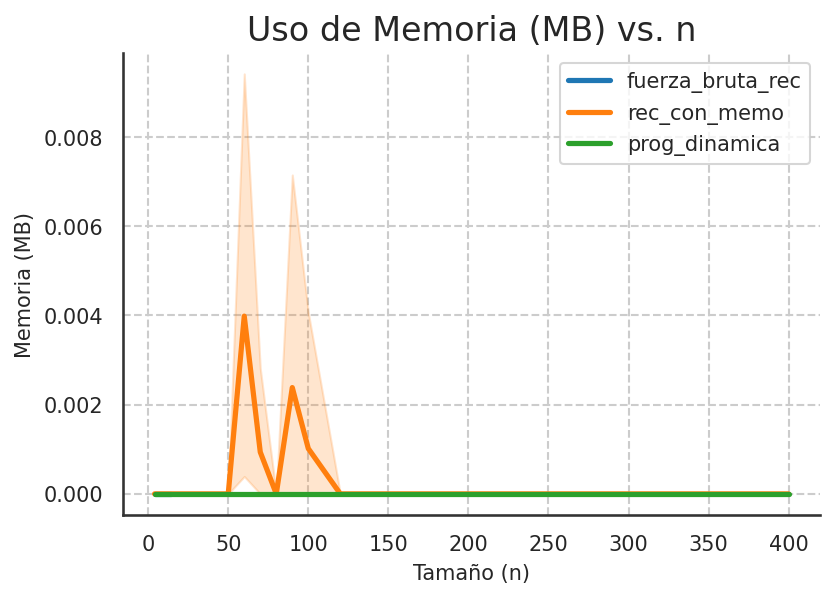

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df_ok, x='n', y='memoria_max_mb', hue='algoritmo',
             estimator='mean', markers=True, palette = 'tab10')
plt.title("Uso de Memoria (MB) vs. n")
plt.ylabel("Memoria (MB)")
plt.xlabel("Tamaño (n)")
plt.legend()
plt.show()

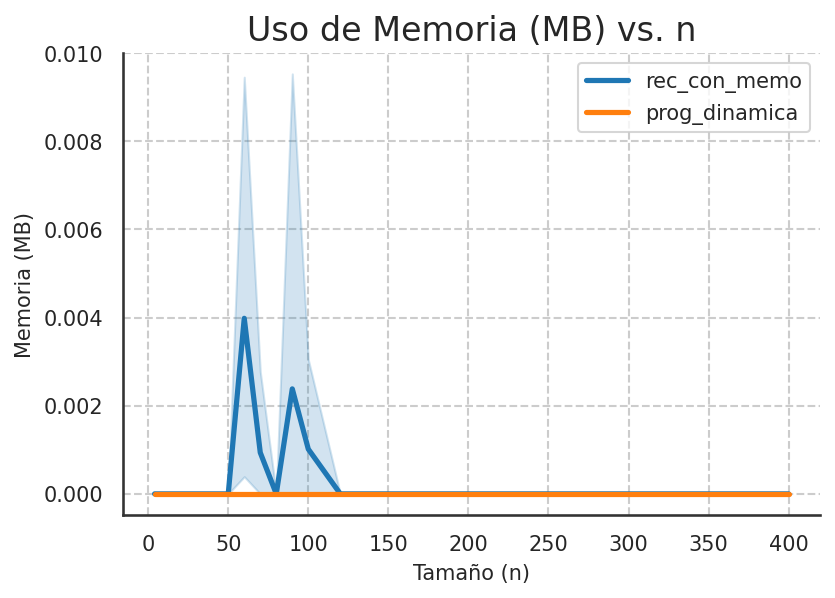

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df_subset, x='n', y='memoria_max_mb', hue='algoritmo',
             estimator='mean', markers=True, palette = 'tab10')
plt.title("Uso de Memoria (MB) vs. n")
plt.ylabel("Memoria (MB)")
plt.xlabel("Tamaño (n)")
plt.legend()
plt.show()

#### Gráficos vs crecimientos teóricos

In [ ]:
# definir la función 2^n hasta 15

def f(n):
    return 2**n

x_bruta = np.arange(1, 15)
y_bruta = f(x_bruta)

In [ ]:
# definir los n^2

def f2(n):
    return n**2

x_n2 = np.arange(1, 400)
y_n2 = f2(x_n2)

In [ ]:
e1 = 8e+2
e2 = 6.5e+2
e3 = 17e+1

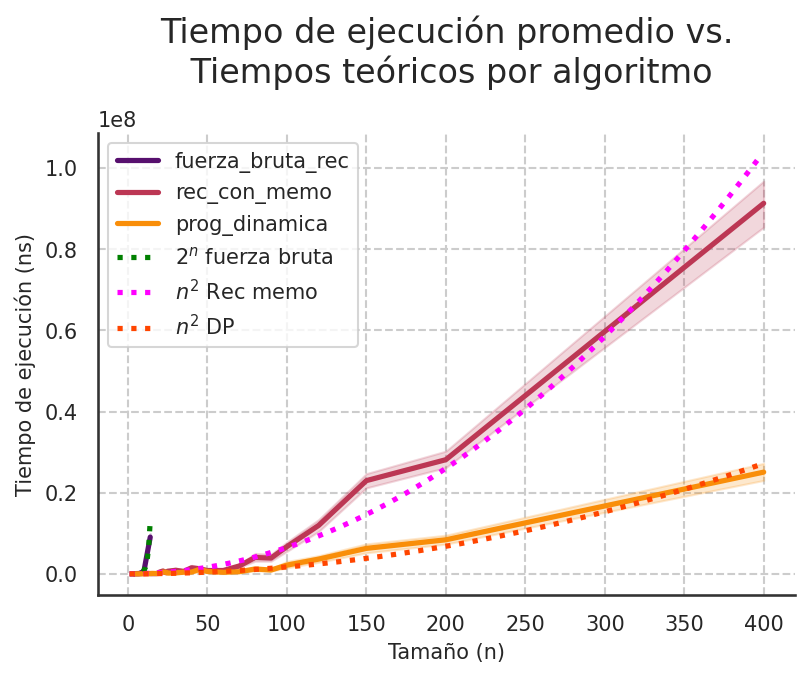

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df_ok, x='n', y='tiempo_ejecucion', hue='algoritmo',
             estimator='mean', markers=True, palette = 'inferno')
sns.lineplot(x=x_bruta, y=e1*y_bruta, color='green', linestyle=':', label='$2^{n}$ fuerza bruta')
sns.lineplot(x=x_n2, y=e2*y_n2, color='magenta', linestyle=':', label='$n^{2}$ Rec memo')
sns.lineplot(x=x_n2, y=e3*y_n2, color='orangered', linestyle=':', label='$n^{2}$ DP')
plt.title("Tiempo de ejecución promedio vs.\n Tiempos teóricos por algoritmo\n")
plt.ylabel("Tiempo de ejecución (ns)")
plt.xlabel("Tamaño (n)")
plt.legend()
plt.show()

#### Más estadística descriptiva:

In [ ]:
def boxplot(data=df_ok, palette='viridis'):
  plt.figure(figsize=(10, 5))
  sns.boxplot(
      data=data,
      x='n',
      y='tiempo_ejecucion',
      hue='algoritmo',
      palette=palette,
      showfliers=False  # Opcional: ocultar outliers si hay muchos
  )
  plt.yscale('log')  # Escala logarítmica para mejor visualización
  plt.title("Distribución de Tiempos de Ejecución por Algoritmo y Tamaño n (Escala Logarítmica)\n")
  plt.xlabel("Tamaño (n)")
  plt.ylabel("Tiempo de Ejecución (ns)")
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()

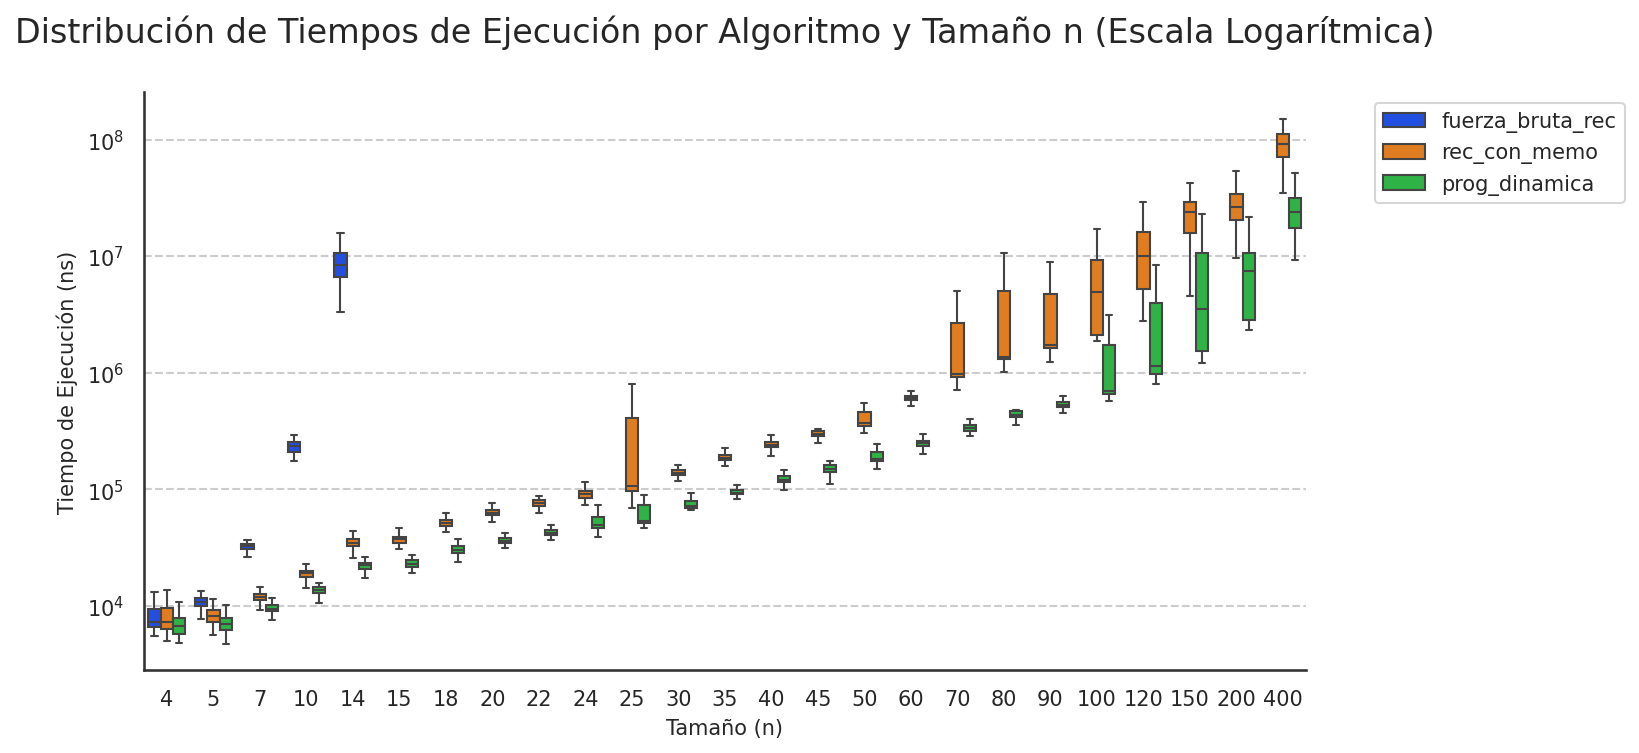

In [ ]:
boxplot(df_ok, 'bright')

In [ ]:
def grafico_barras_categorias(data=df_ok, palette='viridis'):
    """Barras agrupadas por categoría de tamaño"""
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=data,
        x='category_size',
        y='tiempo_ejecucion',
        hue='algoritmo',
        palette=palette,
        estimator='median',
        errorbar=None
    )
    plt.yscale('log')
    plt.title("Tiempo Promedio por Categoría de Tamaño")
    plt.xlabel("Categoría")
    plt.ylabel("Tiempo (ns) - Escala Log")
    plt.legend(title='Algoritmo')
    plt.show()

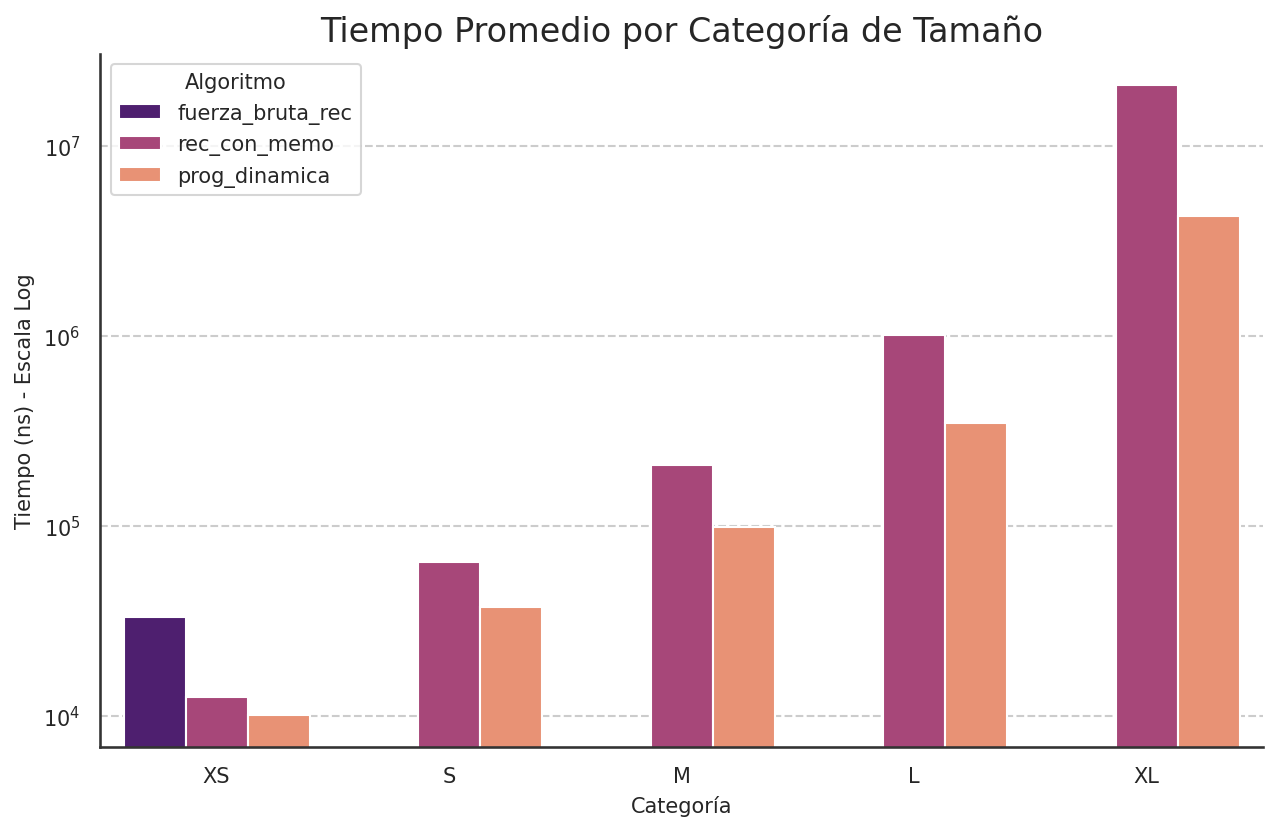

In [ ]:
grafico_barras_categorias(df_ok, 'magma')

In [ ]:
def grafico_facetgrid_tipos(data=df_ok, palette='tab10'):
    """FacetGrid comparando tipos de instancia"""
    g = sns.FacetGrid(
        data,
        col='tipo_instancia',
        hue='algoritmo',
        palette=palette,
        height=4,
        aspect=1.2
    )
    g.map(sns.lineplot, 'n', 'tiempo_ejecucion', estimator='mean', marker='o')
    g.add_legend()
    g.set_axis_labels("Tamaño (n)", "Tiempo (ns)")
    g.set_titles("Tipo de Instancia: {col_name}")
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle("Comparación entre Tipos de Instancia")
    plt.show()


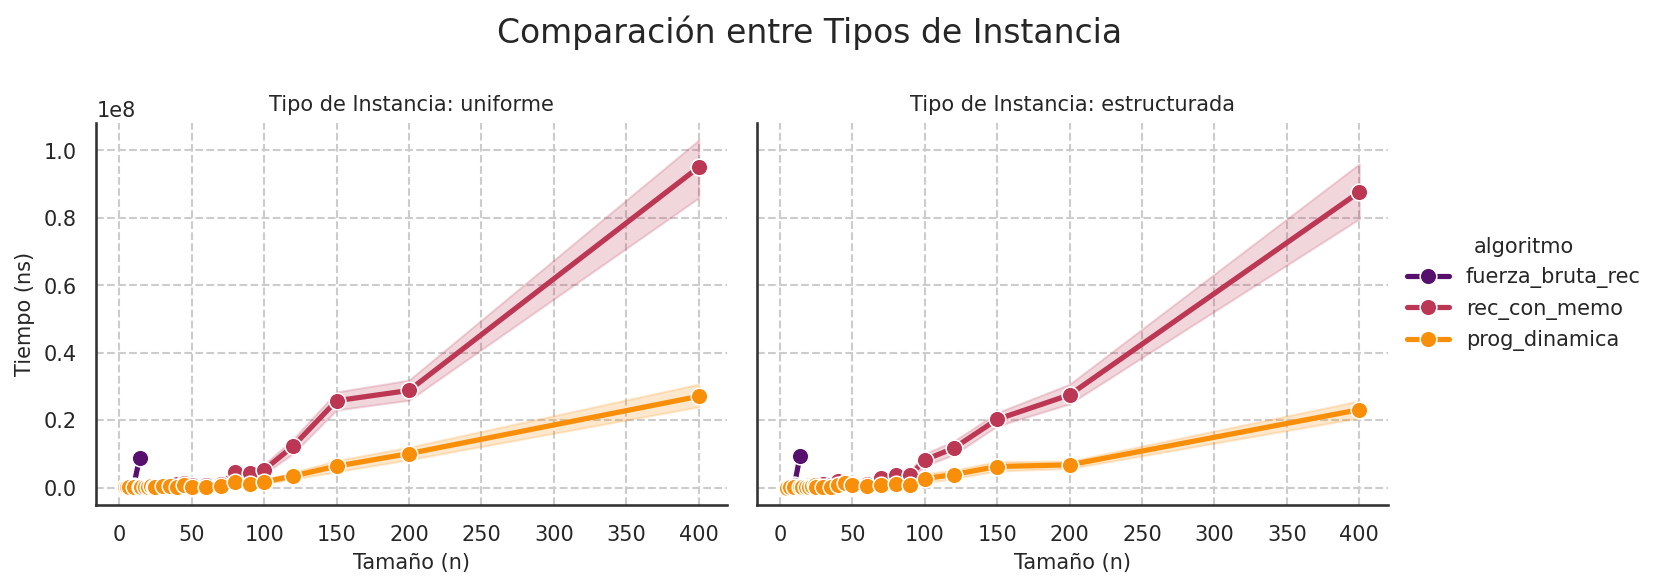

In [ ]:
grafico_facetgrid_tipos(df_ok, 'inferno')

In [ ]:
def grafico_interactivo_plotly(data=df_ok, palette='viridis'):
    """Gráfico interactivo con Plotly"""
    fig = px.line(
        data,
        x='n',
        y='tiempo_ejecucion',
        color='algoritmo',
        line_group='replica_id',
        facet_col='tipo_instancia',
        log_y=True,
        title="Análisis Interactivo de Tiempos",
        labels={'n': 'Tamaño (n)', 'tiempo_ejecucion': 'Tiempo (ns)'},
        color_discrete_sequence=sns.color_palette(palette).as_hex()
    )
    fig.update_layout(height=700, width=1000)
    fig.show()

In [ ]:
grafico_interactivo_plotly(df_ok, 'plasma')

In [ ]:
def scatter_tiempo_vs_memoria(df=None, palette="magma"):
    """
    Muestra un diagrama de dispersión (scatterplot) de tiempo_ejecucion vs memoria_max_mb,
    coloreado por algoritmo. Útil para ver correlación entre tiempo y memoria.
    """
    if df is None:
        print("Advertencia: df es None. Usando df_ok por defecto.")
        df = df_ok

    plt.figure(figsize=(6,4))
    sns.scatterplot(
        data=df,
        x='memoria_max_mb',
        y='tiempo_ejecucion',
        hue='algoritmo',
        palette=palette
    )
    plt.title("Relación entre Tiempo y Memoria por Algoritmo")
    plt.xlabel("Memoria (MB)")
    plt.ylabel("Tiempo de ejecución (ns)")
    plt.legend()
    plt.tight_layout()
    plt.show()

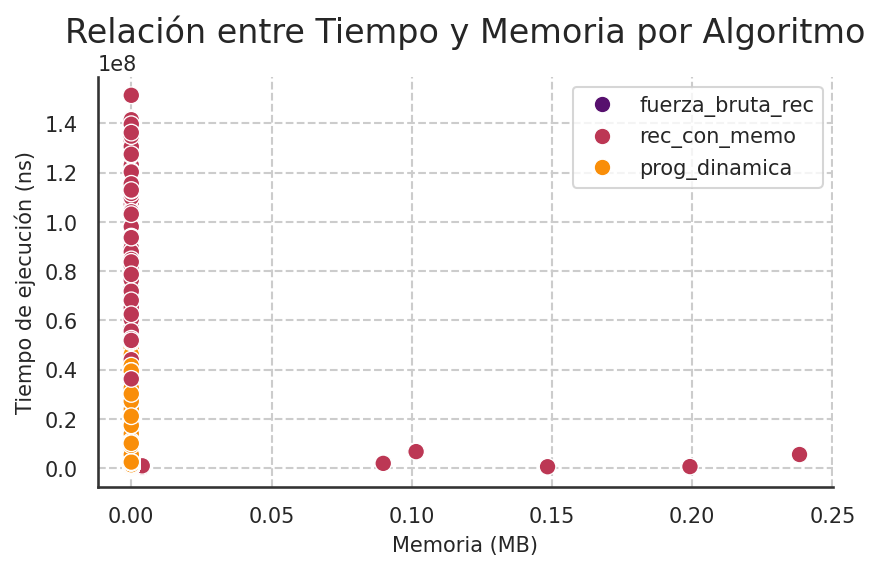

In [ ]:
scatter_tiempo_vs_memoria(df_ok, 'inferno')

### **5.2 Contraste de Hipótesis (ANOVA, Pruebas Post-hoc, t-Test, etc.)**

#### **5.2.1 ANOVA**

Para la Hipótesis 1 (tiempo de ejecución):

Podemos realizar un ANOVA de un factor (algoritmo) para un `n` fijo, o un ANOVA de dos factores (algoritmo, `n`). Ejemplo con statsmodels:


In [ ]:
# Filtramos un n mediano, por ejemplo n=14 (donde todos tienen datos)

df_n14 = df_ok[df_ok['n'] == 14]
model = ols('tiempo_ejecucion ~ C(algoritmo)', data=df_n14).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

                    sum_sq     df           F        PR(>F)
C(algoritmo)  5.387558e+15    2.0  369.190914  2.896695e-81
Residual      2.167042e+15  297.0         NaN           NaN


* **Significado del p-valor (ANOVA)**

Como el  valor $PR(>F) = 2.896695 × 10^{-81}$ es extremadamente pequeño (mucho menor a $0.05$ o incluso $0.001$).

Esto indica que podemos rechazar la hipótesis nula **$H_0$**  de que "todas las medias de las mediciones (una por cada algoritmo) son iguales" en el tamaño **$n=14$**.

En otras palabras, al menos un algoritmo difiere significativamente de los demás en la métrica que has analizado (puede que sea el tiempo de ejecución, la versión logarítmica de tiempo, etc.).


In [ ]:
model = ols('tiempo_ejecucion ~ C(algoritmo)', data=df_ok_hasta_n14).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

                    sum_sq      df           F        PR(>F)
C(algoritmo)  1.258443e+15     2.0  105.050401  2.030166e-43
Residual      8.966597e+15  1497.0         NaN           NaN


* **Significado del p-valor (ANOVA)**

Como el  valor $PR(>F) = 2.030166 × 10^{-43}$ es extremadamente pequeño (mucho menor a $0.05$ o incluso $0.001$).

Esto indica que podemos rechazar la hipótesis nula **$H_0$**  de que "todas las medias de las mediciones (una por cada algoritmo) son iguales" en el tamaño **$n\leq 14$**.

En otras palabras, al menos un algoritmo difiere significativamente de los demás en la métrica que has analizado (puede que sea el tiempo de ejecución, la versión logarítmica de tiempo, etc.).

In [ ]:
# Usamos todos los tamaños n de las instancias

model = ols('tiempo_ejecucion ~ C(algoritmo)', data=df_ok).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

                    sum_sq      df          F        PR(>F)
C(algoritmo)  3.520056e+16     2.0  89.383672  6.295298e-39
Residual      1.082398e+18  5497.0        NaN           NaN


* **Significado del p-valor (ANOVA)**

Como el  valor $PR(>F) =  6.295298 × 10^{-39}$ es extremadamente **más** pequeño (mucho menor a $0.05$ o incluso $0.001$).

Esto indica que podemos rechazar la hipótesis nula **$H_0$**  de que "todas las medias de las mediciones (una por cada algoritmo) son iguales". Sin embargo hay un sesgo en el tamaño de instancias de: **fuerza_bruta_rec**, entonces solo podemos comparar directamente **rec_con_memo** con **prog_dinamica** y si queremos compararlos a su vez con fuerza_bruta_rec, debe ser en el intervalo $n =  [1,15].$

En otras palabras, al menos un algoritmo difiere significativamente de los demás en la métrica que has analizado (puede que sea el tiempo de ejecución, la versión logarítmica de tiempo, etc.).


In [ ]:
# Usamos todos los tamaños n de las instancias

model = ols('tiempo_ejecucion ~ C(algoritmo)*C(n)', data=df_ok).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

                         sum_sq      df          F    PR(>F)
C(algoritmo)       7.405152e+14     2.0  13.345624  0.000002
C(n)               1.150145e+15    24.0   1.727333  0.015118
C(algoritmo):C(n)  9.068080e+09    48.0   0.000007  0.997918
Residual           1.510647e+17  5445.0        NaN       NaN


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 48, but rank is 1



Aquí de hecho python nos hace la recomendación de que esto **no** se debería hacer: `ValueWarning: covariance of constraints does not have full rank. The number of constraints is 48, but rank is 1
  warnings.warn('covariance of constraints does not have full '`
Dado que al agregar **$*C(n)$** en el model `ols` estamos viendo sí hay diferencias entre las instancias y los algoritmos y aunque es cierto hay una infraproporción de uno de los algorimtos, en este caso: **fuerza_bruta_rec**. Ya ahondaremos más en las pruebas **Tukey** y veremos el sesgo a profundidad...





* **Conclusión General del ANOVA**

Existe un efecto significativo del factor "algoritmo" sobre la variable dependiente (la que estés midiendo).
No se sabe todavía cuáles algoritmos difieren entre sí; para eso se hace el análisis post-hoc (Tukey u otro).

#### **5.2.2 Pruebas post-hoc**
Luego, hacemos pruebas post-hoc (p.ej., TukeyHSD):

In [ ]:
# Prubea de los tres algoritmos en n = 14

mc1 = pairwise_tukeyhsd(df_n14['tiempo_ejecucion'], df_n14['algoritmo'], alpha=0.05)
print(mc1)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1          group2      meandiff  p-adj      lower         upper     reject
------------------------------------------------------------------------------------
fuerza_bruta_rec prog_dinamica -9014641.54    0.0 -9914466.7545 -8114816.3255   True
fuerza_bruta_rec  rec_con_memo -8964399.26    0.0 -9864224.4745 -8064574.0455   True
   prog_dinamica  rec_con_memo    50242.28 0.9905  -849582.9345   950067.4945  False
------------------------------------------------------------------------------------


Esto nos indica qué pares de algoritmos difieren significativamente con **$n = 14$** y es obtiene:
- `fuerza_bruta_rec` con **`rec_con_memo`**: $P$-valor $\approx 0$ y se rechaza (reject = **`True`**).
- `fuerza_bruta_rec` con **`prog_dinamica`**: $P$-valor $\approx 0$ y se rechaza (reject = **`True`**).
- `rec_con_memo` con **`prog_dinamica`** $P$-valor $= 0.9905$ y **NO** se rechaza (reject = **`False`**). Es decir con n = 14 no hay suficiente evidencia estadística, para decir que los dos algoritmos difieren en tiempo.

In [ ]:
# Prubea de los tres algoritmos en n < 15

mc2 = pairwise_tukeyhsd(df_ok_hasta_n14['tiempo_ejecucion'], df_ok_hasta_n14['algoritmo'], alpha=0.05)
print(mc2)

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1          group2      meandiff   p-adj      lower         upper     reject
-------------------------------------------------------------------------------------
fuerza_bruta_rec prog_dinamica -1959235.566    0.0 -2322370.5323 -1596100.5997   True
fuerza_bruta_rec  rec_con_memo -1926389.202    0.0 -2289524.1683 -1563254.2357   True
   prog_dinamica  rec_con_memo    32846.364 0.9755  -330288.6023   395981.3303  False
-------------------------------------------------------------------------------------


Aquí observamos un resultado similar a la varianza tomada en **$n = 14$** y ahora con **$n \leq 14$** se obtiene:
- `fuerza_bruta_rec` con **`rec_con_memo`**: $P$-valor $\approx 0$ y se rechaza (reject = **`True`**).
- `fuerza_bruta_rec` con **`prog_dinamica`**: $P$-valor $\approx 0$ y se rechaza (reject = **`True`**).
- `rec_con_memo` con **`prog_dinamica`** $P$-valor $= 0.9755$ y **NO** se rechaza (reject = **`False`**). Es decir con $n \leq 14$ no hay suficiente evidencia estadística, para decir que los dos algoritmos difieren en tiempo.

In [ ]:
# Ahora veamos rec_con_memo con prog_dinamica en todos los n, es decir entre 1 y 400

df_xl = df_subset[df_subset['algoritmo'].isin(['rec_con_memo', 'prog_dinamica'])]

mc3 = pairwise_tukeyhsd(df_xl['tiempo_ejecucion'], df_xl['algoritmo'], alpha=0.05)
print(mc3)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
    group1       group2      meandiff   p-adj    lower        upper     reject
------------------------------------------------------------------------------
prog_dinamica rec_con_memo 5057204.1656   0.0 4244535.1716 5869873.1596   True
------------------------------------------------------------------------------


Aquí observamos que `rec_con_memo` con **`prog_dinamica`** $P$-valor $\approx 0$ y se rechaza (reject = **`True`**).

Es decir con todos los $n$ hay suficiente evidencia estadística, para decir que los **$2$** algoritmos difieren en tiempo.

In [ ]:
# Ahora hagamos la prueba con TODOS los n en los 3 algoritmos, para ver el sesgo entre
# Fuerza bruta y prgramación dinámica:

mc4 = pairwise_tukeyhsd(df_ok['tiempo_ejecucion'], df_ok['algoritmo'], alpha=0.05)
print(mc4)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1          group2      meandiff   p-adj      lower        upper     reject
------------------------------------------------------------------------------------
fuerza_bruta_rec prog_dinamica  137689.9644 0.9781 -1473906.5603 1749286.4891  False
fuerza_bruta_rec  rec_con_memo   5194894.13    0.0  3583297.6053 6806490.6547   True
   prog_dinamica  rec_con_memo 5057204.1656    0.0  4126748.4783 5987659.8529   True
------------------------------------------------------------------------------------


Esto nos indica qué pares de algoritmos difieren significativamente con todos los **$n$** y se obtiene:
- `fuerza_bruta_rec` con **`prog_dinamica`**: $P$-valor $= 0.9781 $ y **NO** se rechaza (reject = **`False`**). Sin embargo esto sucede porque **NO** se deberían comparar los experimentos de los dos algorimtos debido a la diferencia abismal de las varianzas entre las medidas de los tiempos, ya que los $n$ en que se evalúan son demasiado dispajeros hay 2000 experimentos menos en `fuerza_bruta_rec`. Por lo tanto ese p-valor está sesgado estadísticamente hablando.
- `fuerza_bruta_rec` con **`rec_con_memo`**: $P$-valor $\approx 0$ y se rechaza (reject = **`True`**).
- `rec_con_memo` con **`prog_dinamica`** $P$-valor $\approx 0$ y se rechaza (reject = **`True`**).

Es decir con todos los $n$ hay suficiente evidencia estadística, para decir que TODOS los algoritmos difieren en tiempo.

#### **5.2.3 Prueba t-Test**
Para comparar “Recursivo con Memo” vs. “Prog Dinámica” en términos de memoria, por ejemplo, podríamos filtrar esos dos algoritmos y realizar un t-test:

In [ ]:
df_rmemo = df_ok[df_ok['algoritmo'] == 'rec_con_memo']
df_pdin = df_ok[df_ok['algoritmo'] == 'prog_dinamica']

stat, pval = ttest_ind(df_rmemo['memoria_max_mb'], df_pdin['memoria_max_mb'], equal_var=False)
print(f"T-test Memoria Rec Memo vs Prog Din:\n\n ● statistic = {stat}\n ● P-value = {pval}")

T-test Memoria Rec Memo vs Prog Din:

 ● statistic = 2.248913319566825
 ● P-value = 0.02460477898059686


Si $p<0.05$, rechazamos la hipótesis nula de igualdad de medias en la meoria máxima almacenada en cada algoritmo (Recursivo memo y programación dinámica)

* **Interpretación del p-value**

  El $p$-valor **$= 0.0246047$** es mucho menor que cualquier umbral típico de significancia (por ejemplo, $α = 0.05$).

  Esto implica que se rechaza la hipótesis nula de igualdad de medias.

  En otras palabras, **hay** evidencia estadística suficiente para afirmar que Recursivo con Memo y Programación Dinámica difieren en promedio en su uso de memoria (al menos bajo los datos, supuestos y tamaño de muestra con que se corrió la prueba).

* **Conclusión**

  Dado un $p$-value = **$= 0.0246047$** (**< $0.05$**),se puede concluir que existe una diferencia significativa entre el uso de memoria de `"Rec. con Memo"` y `"Prog. Dinámica"`. Dicho en palabras castizas:

  "Se detectan diferencias estadísticamente significativas entre la memoria consumida por el algoritmo recursivo con memoización y la programación dinámica, con el nivel de significancia del $5\%$"

### **5.3 Estadística Descriptiva usando `tracemalloc`**

In [ ]:
# El archivo "resultados_optimizados.csv" es el más grande usado convertido
# del json de 80 MB con 50 réplicas en todos los tamaño y cargamos el usó:
# tracemalloc, para medir memoria, sin embargo veamos las diferencias:

df2 = pd.read_csv("resultados_optimizados2.csv")

df2.head() # primeras 5 filas del dataset

,language,category_size,n,tipo_instancia,algoritmo,replica_id,tiempo_ejecucion,memoria_max_mb,costo_minimo,status
0,Python,XS,4,uniforme,fuerza_bruta_rec,0,693276.0,0.000214,8.0,ok
1,Python,XS,4,uniforme,rec_con_memo,0,392730.0,0.000359,8.0,ok
2,Python,XS,4,uniforme,prog_dinamica,0,234636.0,0.000206,8.0,ok
3,Python,XS,4,uniforme,fuerza_bruta_rec,1,284901.0,0.000214,5.0,ok
4,Python,XS,4,uniforme,rec_con_memo,1,266267.0,0.000359,5.0,ok


In [ ]:
df2['status'].value_counts() # cuántos experimentos no pasaron por ser fuerza_bruta_recursiva

,count
status,
ok,5500
skipped_due_to_large_n,2000


In [ ]:
df2['memoria_max_mb'].value_counts() # contar los valores almacenados en la memoria

,count
memoria_max_mb,
0.000359,207
0.000214,200
0.000252,130
0.000519,102
0.001320,101
...,...
0.001747,1
0.001213,1
0.002815,1


In [ ]:
df2.info() # Información de los valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   language          7500 non-null   object 
 1   category_size     7500 non-null   object 
 2   n                 7500 non-null   int64  
 3   tipo_instancia    7500 non-null   object 
 4   algoritmo         7500 non-null   object 
 5   replica_id        7500 non-null   int64  
 6   tiempo_ejecucion  5500 non-null   float64
 7   memoria_max_mb    5500 non-null   float64
 8   costo_minimo      5500 non-null   float64
 9   status            7500 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 586.1+ KB


In [ ]:
# Filtrar filas skip para quedarse solo con los valores no null

df2_ok = df2[df2['status'] == 'ok']

df2_ok.head()

,language,category_size,n,tipo_instancia,algoritmo,replica_id,tiempo_ejecucion,memoria_max_mb,costo_minimo,status
0,Python,XS,4,uniforme,fuerza_bruta_rec,0,693276.0,0.000214,8.0,ok
1,Python,XS,4,uniforme,rec_con_memo,0,392730.0,0.000359,8.0,ok
2,Python,XS,4,uniforme,prog_dinamica,0,234636.0,0.000206,8.0,ok
3,Python,XS,4,uniforme,fuerza_bruta_rec,1,284901.0,0.000214,5.0,ok
4,Python,XS,4,uniforme,rec_con_memo,1,266267.0,0.000359,5.0,ok


In [ ]:
df2_ok.info() # Corroborar valores no null

<class 'pandas.core.frame.DataFrame'>
Index: 5500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   language          5500 non-null   object 
 1   category_size     5500 non-null   object 
 2   n                 5500 non-null   int64  
 3   tipo_instancia    5500 non-null   object 
 4   algoritmo         5500 non-null   object 
 5   replica_id        5500 non-null   int64  
 6   tiempo_ejecucion  5500 non-null   float64
 7   memoria_max_mb    5500 non-null   float64
 8   costo_minimo      5500 non-null   float64
 9   status            5500 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 472.7+ KB


In [ ]:
# 1) Descripción general en TIEMPO

desc_tiempos2 = df2_ok.groupby(['n','algoritmo'])['tiempo_ejecucion'].describe()
print(desc_tiempos2)

                      count          mean           std          min  \
n   algoritmo                                                          
4   fuerza_bruta_rec  100.0  3.672911e+04  2.120665e+04      19579.0   
    prog_dinamica     100.0  3.717457e+04  1.113716e+04      23245.0   
    rec_con_memo      100.0  4.082959e+04  1.143614e+04      20744.0   
5   fuerza_bruta_rec  100.0  8.236321e+04  3.103806e+05      35216.0   
    prog_dinamica     100.0  5.254474e+04  1.271935e+05      25378.0   
    rec_con_memo      100.0  1.298036e+05  6.702027e+05      30012.0   
7   fuerza_bruta_rec  100.0  1.506144e+05  2.054311e+04     116730.0   
    prog_dinamica     100.0  4.509742e+04  1.636492e+04      31451.0   
    rec_con_memo      100.0  5.856351e+04  7.940189e+03      39281.0   
10  fuerza_bruta_rec  100.0  1.148520e+06  3.594599e+05     926737.0   
    prog_dinamica     100.0  5.843086e+04  7.575043e+03      47492.0   
    rec_con_memo      100.0  8.211965e+04  1.308444e+04      602

In [ ]:
# 1.1) Descripción más específica en TIEMPO

desc_tiempos_especificos2 = df2_ok.groupby(['category_size','algoritmo', 'tipo_instancia'])['tiempo_ejecucion'].describe()
print(desc_tiempos_especificos2)

                                               count          mean  \
category_size algoritmo        tipo_instancia                        
L             prog_dinamica    estructurada    250.0  7.697207e+05   
                               uniforme        250.0  7.041240e+05   
              rec_con_memo     estructurada    250.0  1.521234e+06   
                               uniforme        250.0  1.479055e+06   
M             prog_dinamica    estructurada    250.0  2.444284e+05   
                               uniforme        250.0  2.436803e+05   
              rec_con_memo     estructurada    250.0  3.968647e+05   
                               uniforme        250.0  3.608951e+05   
S             prog_dinamica    estructurada    250.0  1.221438e+05   
                               uniforme        250.0  1.219240e+05   
              rec_con_memo     estructurada    250.0  1.656003e+05   
                               uniforme        250.0  1.685387e+05   
XL            prog_d

In [ ]:
# 1.3) Descripción más específica en TIEMPO

desc_tiempos_especificos3 = df2_ok.groupby(['category_size','tipo_instancia'])['tiempo_ejecucion'].describe()
print(desc_tiempos_especificos3)

                              count          mean           std       min  \
category_size tipo_instancia                                                
L             estructurada    500.0  1.145477e+06  1.092871e+06  339985.0   
              uniforme        500.0  1.091589e+06  8.987910e+05  344402.0   
M             estructurada    500.0  3.206466e+05  3.112951e+05  126811.0   
              uniforme        500.0  3.022877e+05  1.417514e+05  125010.0   
S             estructurada    500.0  1.438721e+05  3.891505e+04   78404.0   
              uniforme        500.0  1.452313e+05  3.975507e+04   82527.0   
XL            estructurada    500.0  5.321761e+07  1.190687e+08  976357.0   
              uniforme        500.0  6.483199e+07  1.432934e+08  965947.0   
XS            estructurada    750.0  1.308865e+06  4.367113e+06   21101.0   
              uniforme        750.0  1.336053e+06  4.486932e+06   19579.0   

                                     25%        50%          75%          m

In [ ]:
# 2) Descripción general en ESPACIO

desc_espacio2 = df2_ok.groupby(['n','algoritmo'])['memoria_max_mb'].describe()
print(desc_espacio2)

                      count      mean           std       min       25%  \
n   algoritmo                                                             
4   fuerza_bruta_rec  100.0  0.000214  0.000000e+00  0.000214  0.000214   
    prog_dinamica     100.0  0.000206  1.906912e-19  0.000206  0.000206   
    rec_con_memo      100.0  0.000290  3.156791e-05  0.000252  0.000252   
5   fuerza_bruta_rec  100.0  0.000259  0.000000e+00  0.000259  0.000259   
    prog_dinamica     100.0  0.000214  0.000000e+00  0.000214  0.000214   
    rec_con_memo      100.0  0.000361  1.051807e-05  0.000359  0.000359   
7   fuerza_bruta_rec  100.0  0.000351  0.000000e+00  0.000351  0.000351   
    prog_dinamica     100.0  0.000229  0.000000e+00  0.000229  0.000229   
    rec_con_memo      100.0  0.000466  7.514473e-06  0.000465  0.000465   
10  fuerza_bruta_rec  100.0  0.000488  0.000000e+00  0.000488  0.000488   
    prog_dinamica     100.0  0.000252  3.813825e-19  0.000252  0.000252   
    rec_con_memo      100

In [ ]:
# 2.1) Descripción más específica en ESPACIO

desc_tiempos_especificos2 = df2_ok.groupby(['category_size', 'tipo_instancia'])['memoria_max_mb'].describe()
print(desc_tiempos_especificos2)

                              count      mean       std       min       25%  \
category_size tipo_instancia                                                  
L             estructurada    500.0  0.002270  0.001653  0.000557  0.000710   
              uniforme        500.0  0.002270  0.001653  0.000557  0.000710   
M             estructurada    500.0  0.001202  0.000807  0.000366  0.000443   
              uniforme        500.0  0.001202  0.000807  0.000366  0.000443   
S             estructurada    500.0  0.000738  0.000429  0.000290  0.000328   
              uniforme        500.0  0.000738  0.000429  0.000290  0.000328   
XL            estructurada    500.0  0.006510  0.007203  0.000938  0.001320   
              uniforme        500.0  0.006510  0.007203  0.000938  0.001320   
XS            estructurada    750.0  0.000384  0.000189  0.000206  0.000229   
              uniforme        750.0  0.000383  0.000190  0.000206  0.000229   

                                   50%       75%   

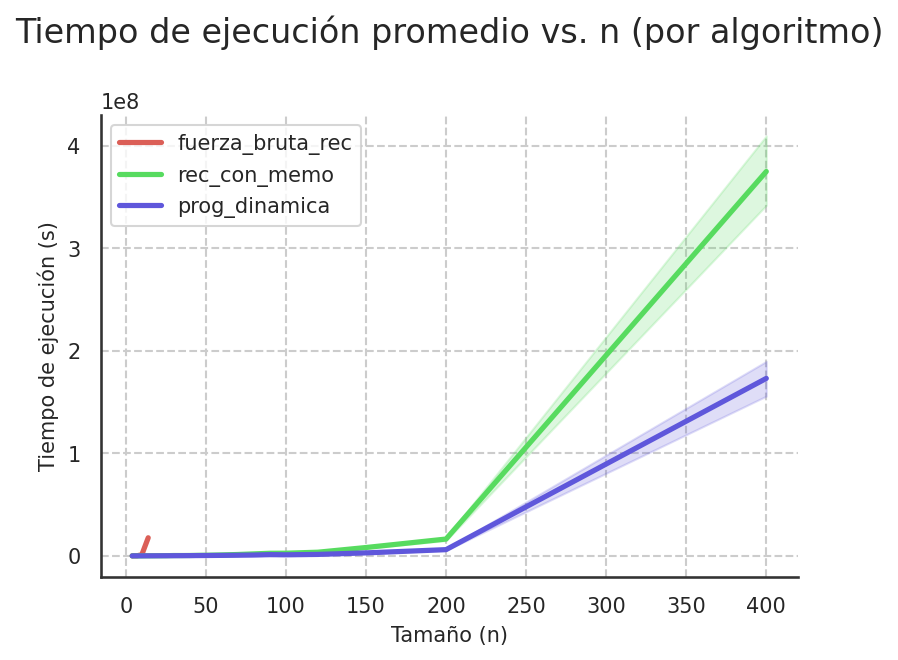

In [ ]:
# 2) Gráfico de líneas: tiempo vs n
plt.figure(figsize=(6,4))
sns.lineplot(data=df2_ok, x='n', y='tiempo_ejecucion', hue='algoritmo',
             estimator='mean', markers=True, palette = 'hls')
plt.title("Tiempo de ejecución promedio vs. n (por algoritmo)\n")
plt.ylabel("Tiempo de ejecución (s)")
plt.xlabel("Tamaño (n)")
plt.legend()
plt.show()

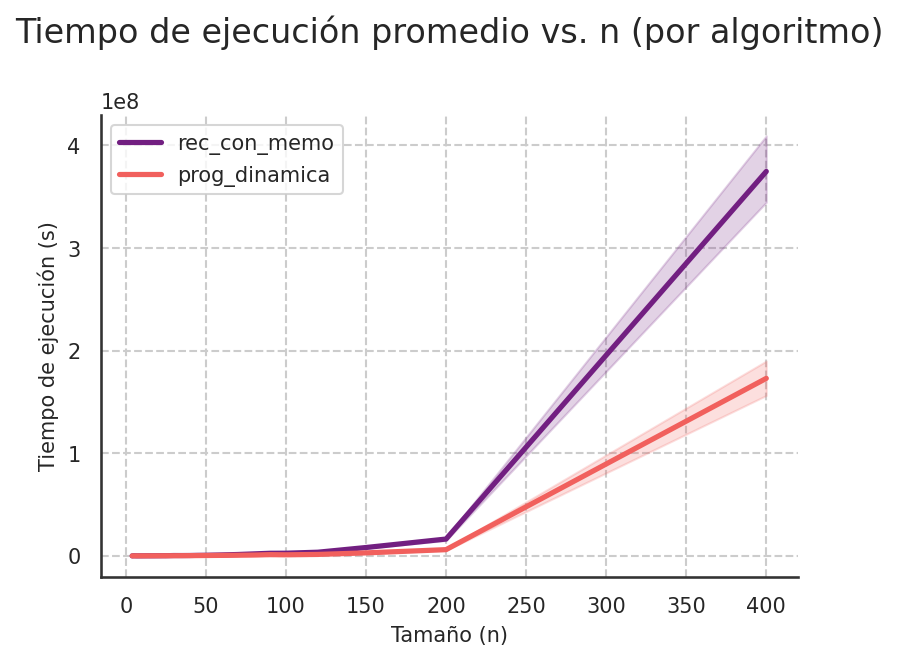

In [ ]:
# Filtra el DataFrame para incluir solo los algoritmos deseados
df_subset2 = df2_ok[df2_ok['algoritmo'].isin(['prog_dinamica', 'rec_con_memo'])]

plt.figure(figsize=(6,4))
sns.lineplot(data=df_subset2, x='n', y='tiempo_ejecucion', hue='algoritmo',
             estimator='mean', markers=True, palette='magma')
plt.title("Tiempo de ejecución promedio vs. n (por algoritmo)\n")
plt.ylabel("Tiempo de ejecución (s)")
plt.xlabel("Tamaño (n)")
plt.legend()
plt.show()

In [ ]:
df2_ok_hasta_n14 = df2_ok[df2_ok['n'] <= 14]

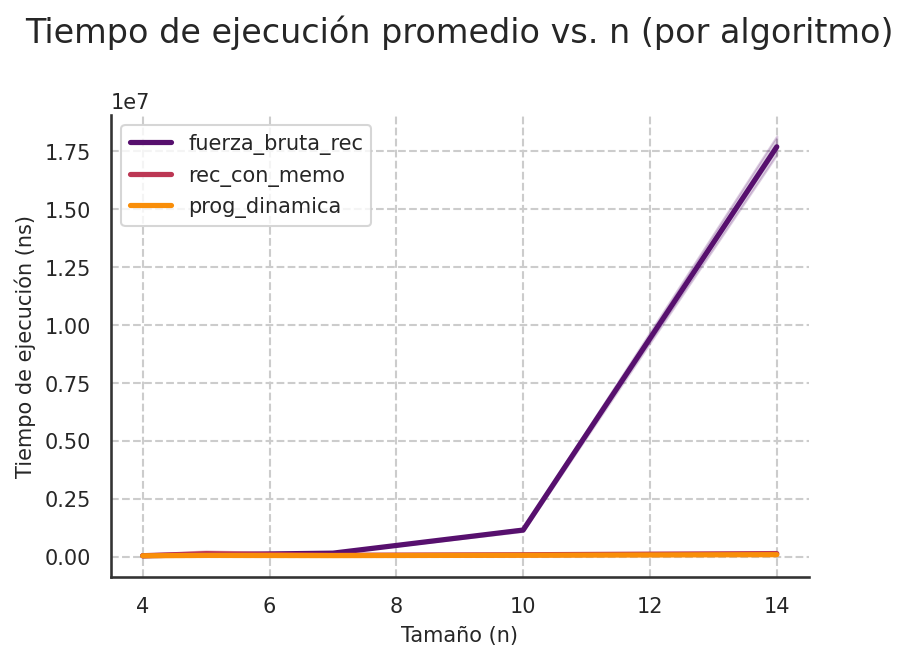

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df2_ok_hasta_n14, x='n', y='tiempo_ejecucion', hue='algoritmo',
             estimator='mean', markers=True, palette = 'inferno')
plt.title("Tiempo de ejecución promedio vs. n (por algoritmo)\n")
plt.ylabel("Tiempo de ejecución (ns)")
plt.xlabel("Tamaño (n)")
plt.legend()
plt.show()

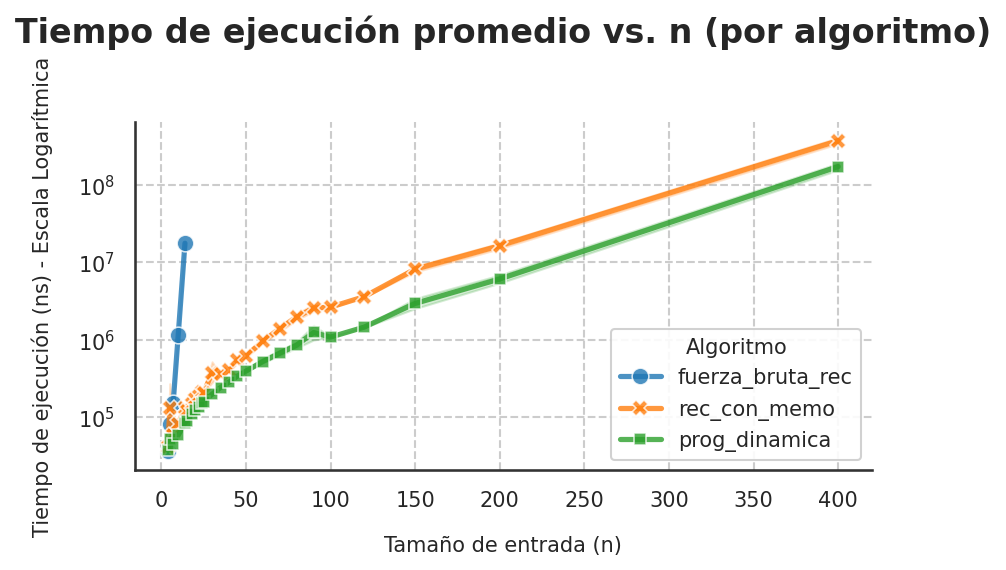

In [ ]:
plot_tiempo_vs_n(df2_ok, palette = 'tab10')

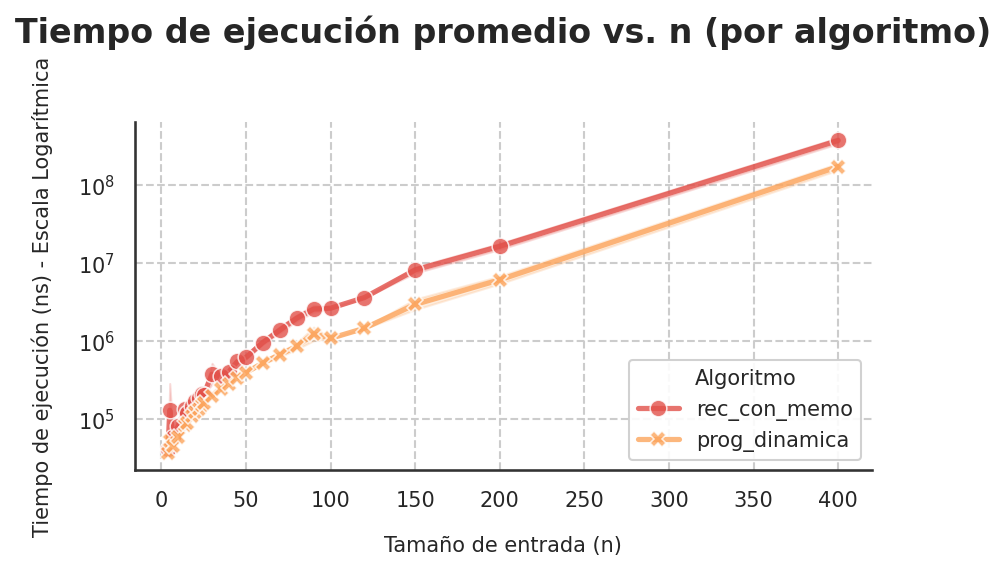

In [ ]:
plot_tiempo_vs_n(df_subset2, palette="Spectral") #tab10, hls, Spectral, husl

#### Uso de memoria:

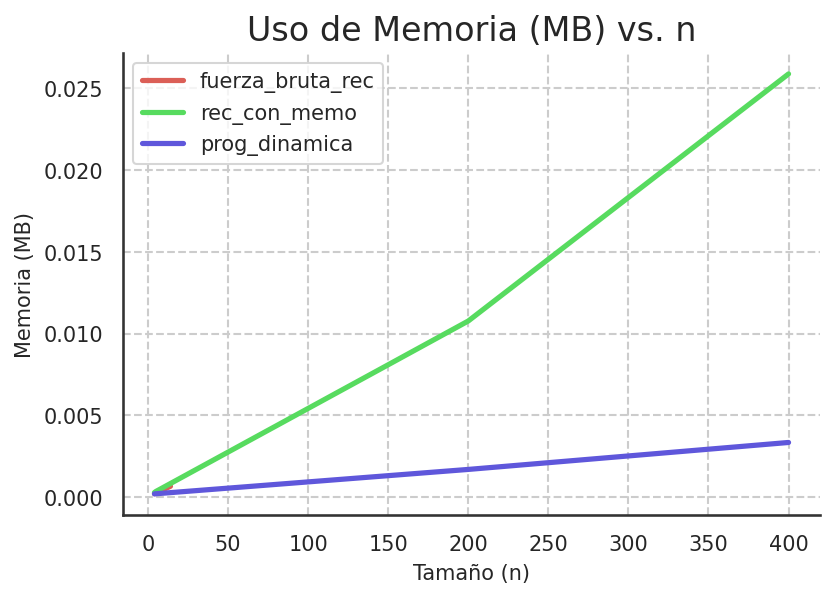

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df2_ok, x='n', y='memoria_max_mb', hue='algoritmo',
             estimator='mean', markers=True, palette = 'hls')
plt.title("Uso de Memoria (MB) vs. n")
plt.ylabel("Memoria (MB)")
plt.xlabel("Tamaño (n)")
plt.legend()
plt.show()

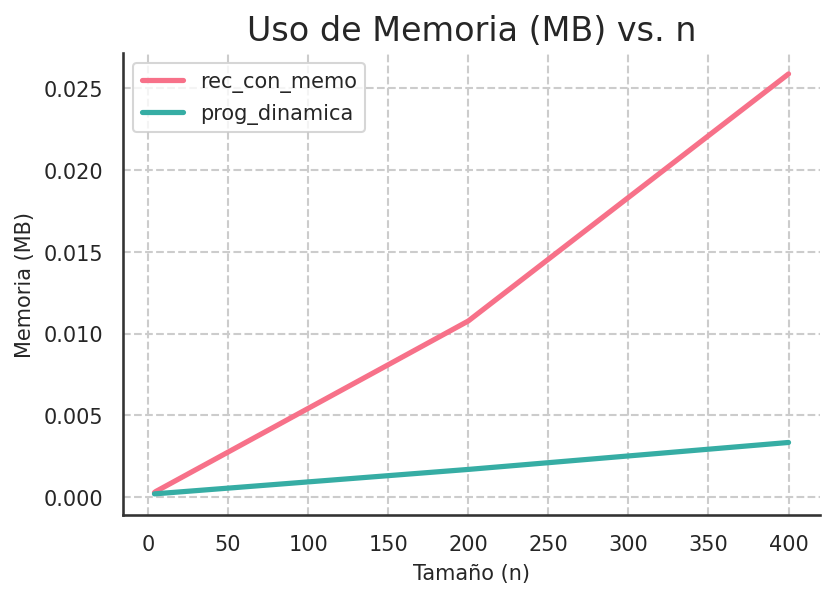

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df_subset2, x='n', y='memoria_max_mb', hue='algoritmo',
             estimator='mean', markers=True, palette = 'husl')
plt.title("Uso de Memoria (MB) vs. n")
plt.ylabel("Memoria (MB)")
plt.xlabel("Tamaño (n)")
plt.legend()
plt.show()

#### Gráficos vs crecimientos teóricos

In [ ]:
e1 = 10e+2
e2 = 20e+2
e3 = 8e+2

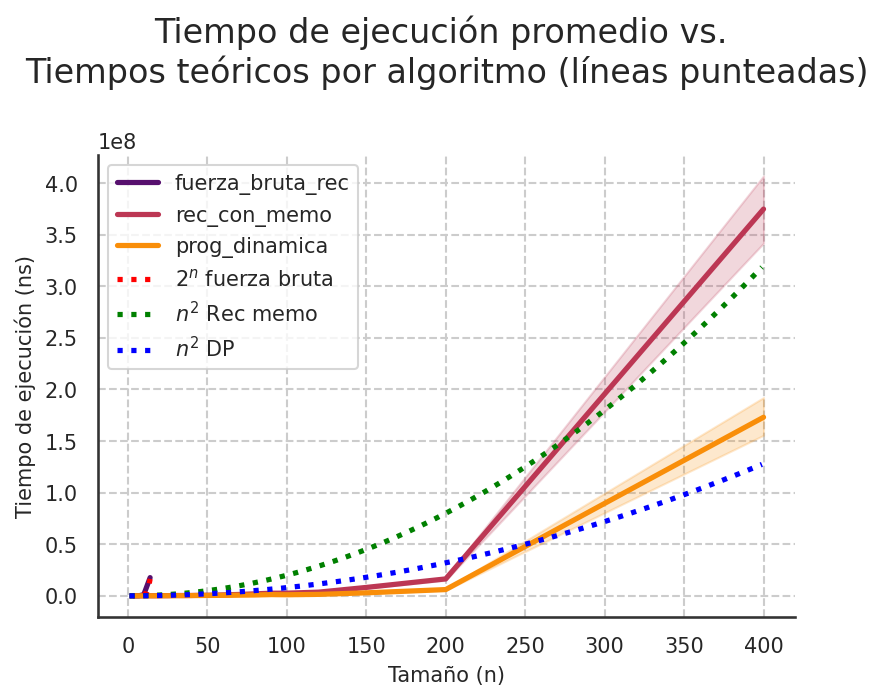

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df2_ok, x='n', y='tiempo_ejecucion', hue='algoritmo',
             estimator='mean', markers=True, palette = 'inferno')
sns.lineplot(x=x_bruta, y=e1*y_bruta, color='red', linestyle=':', label='$2^{n}$ fuerza bruta')
sns.lineplot(x=x_n2, y=e2*y_n2, color='green', linestyle=':', label='$n^{2}$ Rec memo')
sns.lineplot(x=x_n2, y=e3*y_n2, color='blue', linestyle=':', label='$n^{2}$ DP')
plt.title("Tiempo de ejecución promedio vs. \nTiempos teóricos por algoritmo (líneas punteadas)\n")
plt.ylabel("Tiempo de ejecución (ns)")
plt.xlabel("Tamaño (n)")
plt.legend()
plt.show()

#### Más estadística descriptiva:

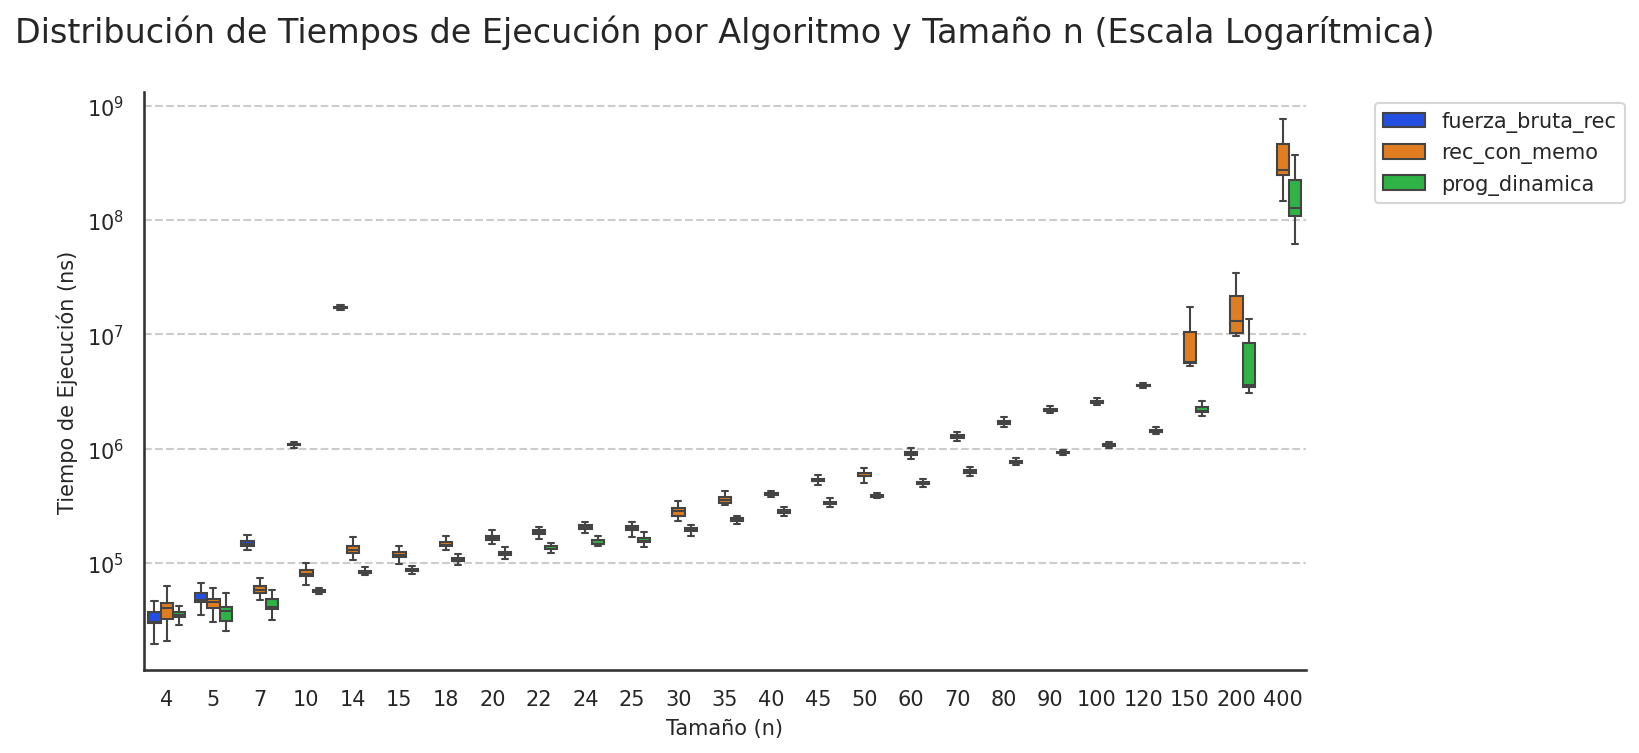

In [ ]:
boxplot(df2_ok, 'bright')

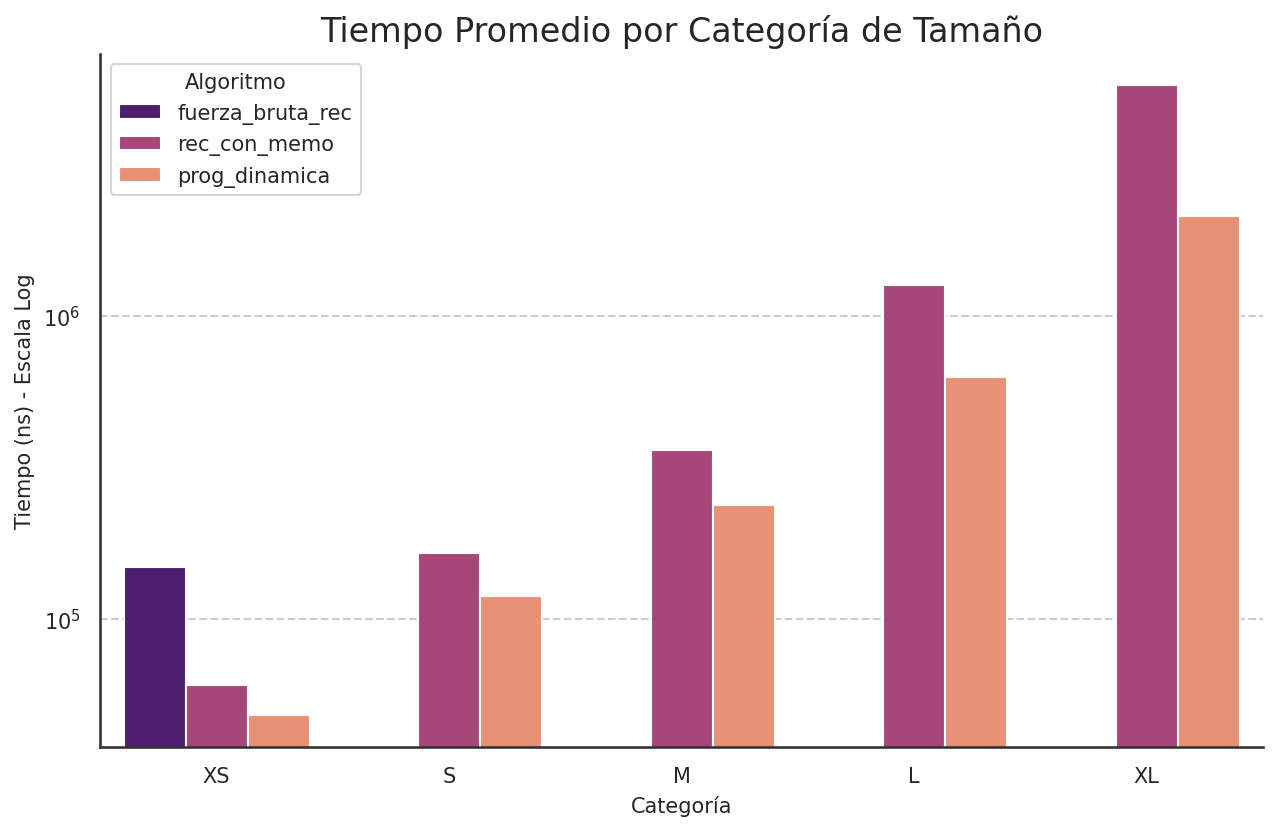

In [ ]:
grafico_barras_categorias(df2_ok, 'magma')

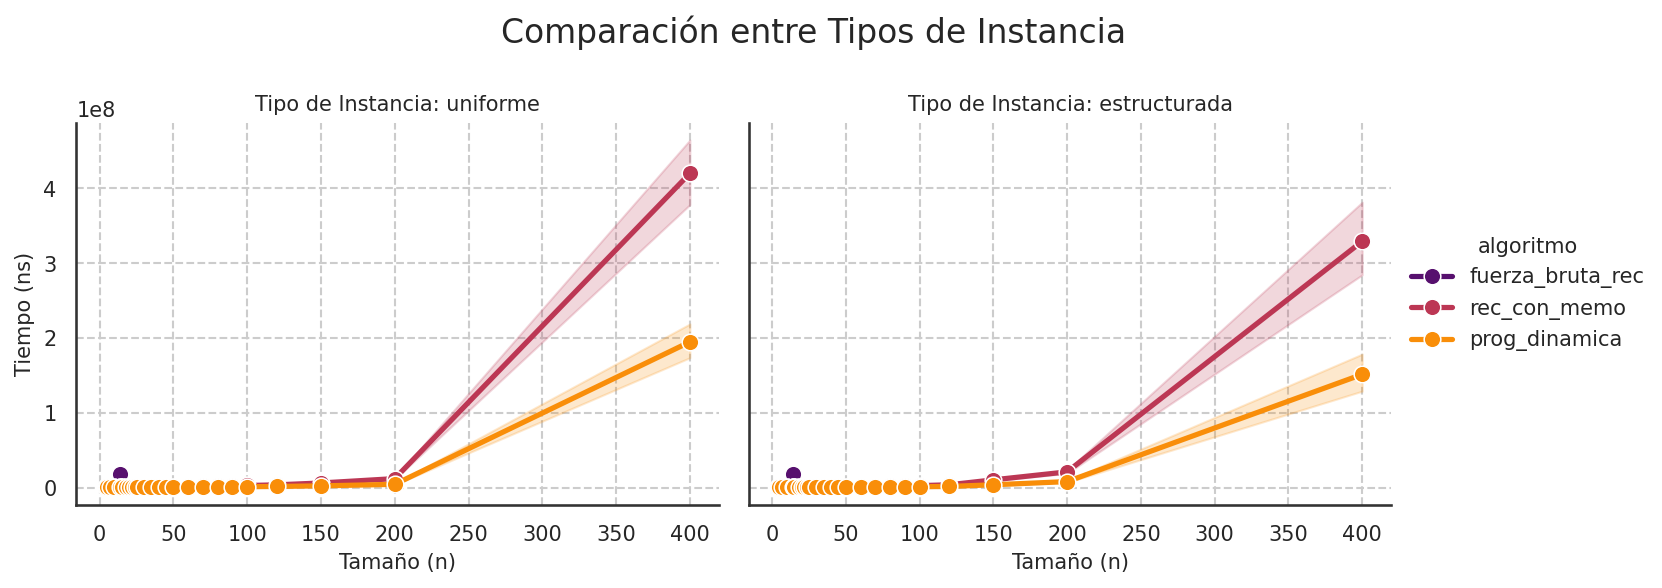

In [ ]:
grafico_facetgrid_tipos(df2_ok, 'inferno')

In [ ]:
grafico_interactivo_plotly(df2_ok, 'tab10')

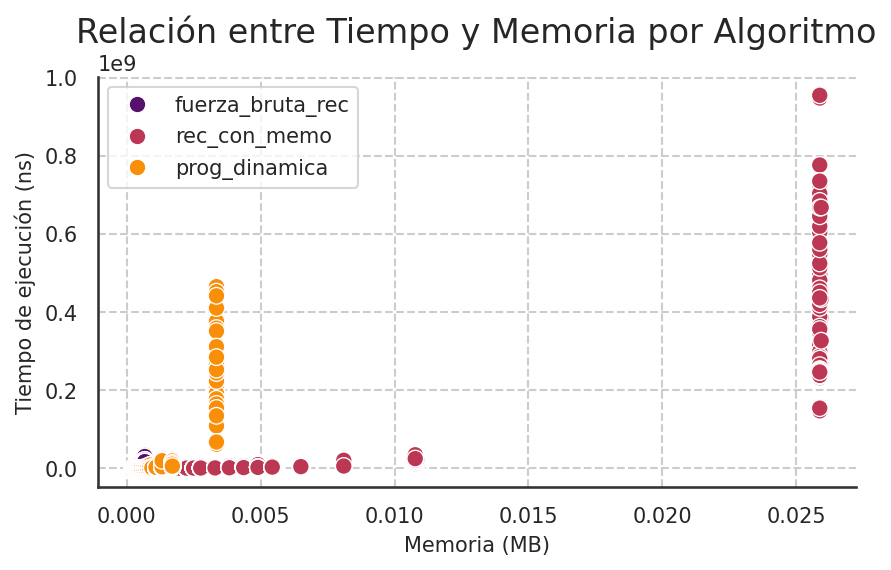

In [ ]:
scatter_tiempo_vs_memoria(df2_ok, 'inferno')

### **5.4 Contraste de Hipótesis (ANOVA, Pruebas Post-hoc, t-Test, etc.)**

#### **5.4.1 ANOVA**

Para la Hipótesis 1 (tiempo de ejecución):

Podemos realizar un ANOVA de un factor (algoritmo) para un `n` fijo, o un ANOVA de dos factores (algoritmo, `n`). Ejemplo con statsmodels:


In [ ]:
# Filtramos un n mediano, por ejemplo n=14 (donde todos tienen datos)

df2_n14 = df2_ok[df2_ok['n'] == 14]
model = ols('tiempo_ejecucion ~ C(algoritmo)', data=df2_n14).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

                    sum_sq     df            F         PR(>F)
C(algoritmo)  2.062193e+16    2.0  6641.073455  2.970082e-247
Residual      4.611237e+14  297.0          NaN            NaN


* **Significado del p-valor (ANOVA)**

Como el  valor $PR(>F) = 2.970082 × 10^{-247}$ es extremadamente pequeño (mucho menor a $0.05$ o incluso $0.001$).

Esto indica que podemos rechazar la hipótesis nula **$H_0$**  de que "todas las medias de las mediciones (una por cada algoritmo) son iguales".

En otras palabras, al menos un algoritmo difiere significativamente de los demás en la métrica que has analizado (puede que sea el tiempo de ejecución, la versión logarítmica de tiempo, etc.).


In [ ]:
model2 = ols('tiempo_ejecucion ~ C(algoritmo)', data=df2_ok_hasta_n14).fit()
anova_results2 = sm.stats.anova_lm(model2, typ=2)
print(anova_results2)

                    sum_sq      df           F        PR(>F)
C(algoritmo)  4.689600e+15     2.0  142.257973  2.737895e-57
Residual      2.467465e+16  1497.0         NaN           NaN


* **Significado del p-valor (ANOVA)**

Como el  valor $PR(>F) = 2.737895 × 10^{-57}$ es extremadamente pequeño (mucho menor a $0.05$ o incluso $0.001$).

Esto indica que podemos rechazar la hipótesis nula **$H_0$**  de que "todas las medias de las mediciones (una por cada algoritmo) son iguales" en el tamaño **$n\leq 14$**.

En otras palabras, al menos un algoritmo difiere significativamente de los demás en la métrica que has analizado (puede que sea el tiempo de ejecución, la versión logarítmica de tiempo, etc.).

In [ ]:
# Usamos todos los tamaños n de las instancias

model3 = ols('tiempo_ejecucion ~ C(algoritmo)', data=df2_ok).fit()
anova_results3 = sm.stats.anova_lm(model3, typ=2)
print(anova_results3)

                    sum_sq      df         F        PR(>F)
C(algoritmo)  1.333962e+17     2.0  18.30725  1.190213e-08
Residual      2.002702e+19  5497.0       NaN           NaN


* **Significado del p-valor (ANOVA)**

Como el  valor $PR(>F) = 1.190213 × 10^{-08}$ es extremadamente **más** pequeño (mucho menor a $0.05$ o incluso $0.001$).

Esto indica que podemos rechazar la hipótesis nula **$H_0$**  de que "todas las medias de las mediciones (una por cada algoritmo) son iguales". Sin embargo hay un sesgo en el tamaño de instancias de: **fuerza_bruta_rec**, entonces solo podemos comparar directamente **rec_con_memo** con **prog_dinamica** y si queremos compararlos a su vez con fuerza_bruta_rec, debe ser en el intervalo $n =  [1,15].$

En otras palabras, al menos un algoritmo difiere significativamente de los demás en la métrica que has analizado (puede que sea el tiempo de ejecución, la versión logarítmica de tiempo, etc.).


In [ ]:
# Usamos todos los tamaños n de las instancias y vemos el sesgo
# en que se ahondará más adelante

model4 = ols('tiempo_ejecucion ~ C(algoritmo)*C(n)', data=df2_ok).fit()
anova_results4 = sm.stats.anova_lm(model4, typ=2)
print(anova_results4)

                         sum_sq      df         F    PR(>F)
C(algoritmo)       3.475123e+15     2.0  2.514102  0.081030
C(n)               3.692057e+16    24.0  2.225870  0.000533
C(algoritmo):C(n)  3.375516e+14    48.0  0.010175  0.919656
Residual           3.763182e+18  5445.0       NaN       NaN


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 48, but rank is 1



Aquí de hecho python nos hace la recomendación de que esto **no** se debería hacer: `ValueWarning: covariance of constraints does not have full rank. The number of constraints is 48, but rank is 1
  warnings.warn('covariance of constraints does not have full '`
Dado que al agregar **$*C(n)$** en el model `ols` estamos viendo sí hay diferencias entre las instancias y los algoritmos y aunque es cierto hay una infraproporción de uno de los algorimtos, en este caso: **fuerza_bruta_rec**. Ya ahondaremos más en las pruebas **Tukey** y veremos el sesgo a profundidad como en el anterior dataet con **`psutil`**...


* **Conclusión General del ANOVA**

Existe un efecto significativo del factor "algoritmo" sobre la variable dependiente (la que estés midiendo).
No se sabe todavía cuáles algoritmos difieren entre sí; para eso se hace el análisis post-hoc (Tukey u otro).

#### **5.4.2 Pruebas post-hoc**
Luego, hacemos pruebas post-hoc (p.ej., TukeyHSD):

In [ ]:
# Prubea de los tres algoritmos en n = 14

mc11 = pairwise_tukeyhsd(df2_n14['tiempo_ejecucion'], df2_n14['algoritmo'], alpha=0.05)
print(mc11)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
     group1          group2      meandiff   p-adj      lower          upper      reject
---------------------------------------------------------------------------------------
fuerza_bruta_rec prog_dinamica -17612111.28    0.0 -18027192.5784 -17197029.9816   True
fuerza_bruta_rec  rec_con_memo -17563284.91    0.0 -17978366.2084 -17148203.6116   True
   prog_dinamica  rec_con_memo     48826.37 0.9586   -366254.9284    463907.6684  False
---------------------------------------------------------------------------------------


Esto nos indica qué pares de algoritmos difieren significativamente con **$n = 14$** y es obtiene:
- `fuerza_bruta_rec` con **`rec_con_memo`**: $P$-valor $\approx 0$ y se rechaza (reject = **`True`**).
- `fuerza_bruta_rec` con **`prog_dinamica`**: $P$-valor $\approx 0$ y se rechaza (reject = **`True`**).
- `rec_con_memo` con **`prog_dinamica`** $P$-valor $= 0.9586$ y **NO** se rechaza (reject = **`False`**). Es decir con n = 14 no hay suficiente evidencia estadística, para decir que los dos algoritmos difieren en tiempo.

In [ ]:
# Prubea de los tres algoritmos en n <= 15

mc22 = pairwise_tukeyhsd(df2_ok_hasta_n14['tiempo_ejecucion'], df2_ok_hasta_n14['algoritmo'], alpha=0.05)
print(mc22)

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1          group2      meandiff   p-adj      lower         upper     reject
-------------------------------------------------------------------------------------
fuerza_bruta_rec prog_dinamica -3767418.072    0.0 -4369810.8326 -3165025.3114   True
fuerza_bruta_rec  rec_con_memo -3734039.054    0.0 -4336431.8146 -3131646.2934   True
   prog_dinamica  rec_con_memo    33379.018 0.9907  -569013.7426   635771.7786  False
-------------------------------------------------------------------------------------


Aquí observamos un resultado similar a la varianza tomada en **$n = 14$** y ahora con **$n \leq 14$** se obtiene:
- `fuerza_bruta_rec` con **`rec_con_memo`**: $P$-valor $\approx 0$ y se rechaza (reject = **`True`**).
- `fuerza_bruta_rec` con **`prog_dinamica`**: $P$-valor $\approx 0$ y se rechaza (reject = **`True`**).
- `rec_con_memo` con **`prog_dinamica`** $P$-valor $= 0.9907$ y **NO** se rechaza (reject = **`False`**). Es decir con $n \leq 14$ no hay suficiente evidencia estadística, para decir que los dos algoritmos difieren en tiempo.

In [ ]:
# Ahora veamos rec_con_memo con prog_dinamica en todos los n, es decir entre 1 y 400

df2_xl = df_subset2[df_subset2['algoritmo'].isin(['rec_con_memo', 'prog_dinamica'])]

mc33 = pairwise_tukeyhsd(df2_xl['tiempo_ejecucion'], df2_xl['algoritmo'], alpha=0.05)
print(mc33)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
    group1       group2     meandiff  p-adj    lower         upper     reject
-----------------------------------------------------------------------------
prog_dinamica rec_con_memo 9033128.72   0.0 5525278.2459 12540979.1941   True
-----------------------------------------------------------------------------


Aquí observamos que `rec_con_memo` con **`prog_dinamica`** $P$-valor $\approx 0$ y se rechaza (reject = **`True`**).

Es decir con todos los $n$ hay suficiente evidencia estadística, para decir que los **$2$** algoritmos difieren en tiempo.

In [ ]:
# Ahora hagamos la prueba con TODOS los n en los 3 algoritmos, para ver el sesgo entre
# Fuerza bruta y prgramación dinámica:

mc44 = pairwise_tukeyhsd(df2_ok['tiempo_ejecucion'], df2_ok['algoritmo'], alpha=0.05)
print(mc44)

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
     group1          group2       meandiff   p-adj      lower         upper     reject
--------------------------------------------------------------------------------------
fuerza_bruta_rec prog_dinamica  3794804.8716 0.4046 -3137392.1924 10727001.9356  False
fuerza_bruta_rec  rec_con_memo 12827933.5916    0.0  5895736.5276 19760130.6556   True
   prog_dinamica  rec_con_memo    9033128.72    0.0  5030822.8791 13035434.5609   True
--------------------------------------------------------------------------------------


Esto nos indica qué pares de algoritmos difieren significativamente con todos los **$n$** y se obtiene:
- `fuerza_bruta_rec` con **`prog_dinamica`**: $P$-valor $= 0.4046 $ y **NO** se rechaza (reject = **`False`**). Sin embargo esto sucede porque **NO** se deberían comparar los experimentos de los dos algorimtos debido a la diferencia abismal de las varianzas entre las medidas de los tiempos, ya que los $n$ en que se evalúan son demasiado dispajeros hay 2000 experimentos menos en `fuerza_bruta_rec`. Por lo tanto ese p-valor está sesgado estadísticamente hablando.
- `fuerza_bruta_rec` con **`rec_con_memo`**: $P$-valor $\approx 0$ y se rechaza (reject = **`True`**).
- `rec_con_memo` con **`prog_dinamica`** $P$-valor $\approx 0$ y se rechaza (reject = **`True`**).

Es decir con todos los $n$ hay suficiente evidencia estadística, para decir que TODOS los algoritmos difieren en tiempo.

#### **5.4.3 Prueba t-Test**
Para comparar “Recursivo con Memo” vs. “Prog Dinámica” en términos de memoria, por ejemplo, podríamos filtrar esos dos algoritmos y realizar un t-test:

In [ ]:
df_rmemo2 = df2_ok[df2_ok['algoritmo'] == 'rec_con_memo']
df_pd2 = df2_ok[df2_ok['algoritmo'] == 'prog_dinamica']

stat, pval = ttest_ind(df_rmemo2['memoria_max_mb'], df_pd2['memoria_max_mb'], equal_var=False)
print(f"T-test Memoria Rec Memo vs Prog Din:\n\n ● statistic = {stat}\n ● P-value = {pval}")

T-test Memoria Rec Memo vs Prog Din:

 ● statistic = 29.408514644134716
 ● P-value = 3.490136293218972e-164


Si $p<0.05$, rechazamos la hipótesis nula de igualdad de medias en la meoria máxima almacenada en cada algoritmo (Recursivo memo y programación dinámica)

* **Interpretación del p-value**

  El $p$-valor **$= 3.49013 10^{-164}$** es mucho menor que cualquier umbral típico de significancia (por ejemplo, $α = 0.05$).

  Esto implica que se rechaza la hipótesis nula de igualdad de medias.

  En otras palabras, **hay** evidencia estadística suficiente para afirmar que Recursivo con Memo y Programación Dinámica difieren en promedio en su uso de memoria (al menos bajo los datos, supuestos y tamaño de muestra con que se corrió la prueba).

* **Conclusión**

  Dado un $p$-value = **$= 3.49013 10^{-164}$** (**< $0.05$**),se puede concluir que existe una diferencia significativa entre el uso de memoria de `"Rec. con Memo"` y `"Prog. Dinámica"`. Dicho en palabras castizas:

  "Se detectan diferencias estadísticamente significativas entre la memoria consumida por el algoritmo recursivo con memoización y la programación dinámica, con el nivel de significancia del $5\%$"

## **6. Regresiones y Técnicas de Machine Learning**

### Random Forest **regresión**

In [ ]:
# A un nuevo dataset agregar la columna librería_memoria == 'psutil' y al otro 'tracemalloc'

data1 = df_ok.copy()
data1['libreria_memoria'] = 'psutil'

data2 = df2_ok.copy()
data2['libreria_memoria'] = 'tracemalloc'

In [ ]:
# Se combinan ambos datasets

dataset = pd.concat([data1, data2], ignore_index=True)
dataset

,language,category_size,n,tipo_instancia,algoritmo,replica_id,tiempo_ejecucion,memoria_max_mb,costo_minimo,status,libreria_memoria
0,Python,XS,4,uniforme,fuerza_bruta_rec,0,48840.0,0.000000,8.0,ok,psutil
1,Python,XS,4,uniforme,rec_con_memo,0,31924.0,0.000000,8.0,ok,psutil
2,Python,XS,4,uniforme,prog_dinamica,0,19215.0,0.000000,8.0,ok,psutil
3,Python,XS,4,uniforme,fuerza_bruta_rec,1,48948.0,0.000000,5.0,ok,psutil
4,Python,XS,4,uniforme,rec_con_memo,1,28295.0,0.000000,5.0,ok,psutil
...,...,...,...,...,...,...,...,...,...,...,...
10995,Python,XL,400,estructurada,prog_dinamica,47,110496995.0,0.003349,1.0,ok,tracemalloc
10996,Python,XL,400,estructurada,rec_con_memo,48,221936747.0,0.025879,1.0,ok,tracemalloc
10997,Python,XL,400,estructurada,prog_dinamica,48,142075332.0,0.003349,1.0,ok,tracemalloc
10998,Python,XL,400,estructurada,rec_con_memo,49,266186342.0,0.025879,1.0,ok,tracemalloc


In [ ]:
# Se elimina la columna de language, status y réplica para la regresión

dataset = dataset.drop(['language', 'status', 'replica_id'], axis=1)
dataset.head()

,category_size,n,tipo_instancia,algoritmo,tiempo_ejecucion,memoria_max_mb,costo_minimo,libreria_memoria
0,XS,4,uniforme,fuerza_bruta_rec,48840.0,0.0,8.0,psutil
1,XS,4,uniforme,rec_con_memo,31924.0,0.0,8.0,psutil
2,XS,4,uniforme,prog_dinamica,19215.0,0.0,8.0,psutil
3,XS,4,uniforme,fuerza_bruta_rec,48948.0,0.0,5.0,psutil
4,XS,4,uniforme,rec_con_memo,28295.0,0.0,5.0,psutil


In [ ]:
# Codificar variables categóricas
encoder = OneHotEncoder(drop="first")
categorical_cols = ['category_size', "tipo_instancia", "algoritmo", "libreria_memoria"]
encoded_features = encoder.fit_transform(dataset[categorical_cols]).toarray()

# Normalizar `n` y `memoria_max_mb`
scaler = StandardScaler()
dataset[["n", "memoria_max_mb"]] = scaler.fit_transform(dataset[["n", "memoria_max_mb"]])

# Concatenar características codificadas

X = np.hstack([dataset[["n", "memoria_max_mb"]].values, encoded_features])
y = np.log(dataset["tiempo_ejecucion"].values)  # Aplicamos transformación logarítmica

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluar
y_pred = model.predict(X_test)
print(f'MAE: {mean_absolute_error(np.exp(y_test), np.exp(y_pred)):.4f}\n')  # Convertimos de nuevo a escala normal
print(f'R²: {r2_score(np.exp(y_test), np.exp(y_pred))*100:.4f} %')

MAE: 1878357.1414

R²: 92.2898 %


In [ ]:
# Se predicen 2 nuevos datos:

nuevas_instancias = pd.DataFrame({
    "category_size": ["XL", "XL"],
    "n": [350, 350],
    "tipo_instancia": ["estructurada", "estructurada"],
    "algoritmo": ["prog_dinamica", "prog_dinamica"],
    "memoria_max_mb": [0.0138, 0.0139],
    "costo_minimo": [1, 1],
    "libreria_memoria": ["psutil", "tracemalloc"]
})

# Aplicar encoding a variables categóricas
nuevas_encoded = encoder.transform(nuevas_instancias[categorical_cols]).toarray()

# Estandarizar `n` y `memoria_max_mb`
nuevas_instancias[["n", "memoria_max_mb"]] = scaler.transform(nuevas_instancias[["n", "memoria_max_mb"]])

# Concatenar con las variables categóricas codificadas
X_nuevas = np.hstack([nuevas_instancias[["n", "memoria_max_mb"]].values, nuevas_encoded])

# Realizar la predicción con el modelo entrenado
predicciones_log = model.predict(X_nuevas)

# Convertir de logaritmo inverso a escala original
predicciones = np.exp(predicciones_log)

# Mostrar resultados
for i, pred in enumerate(predicciones):
    print(f"Instancia {i+1} ({nuevas_instancias['libreria_memoria'][i]}): Predicción de tiempo = {pred:.2f} ns\n")

Instancia 1 (psutil): Predicción de tiempo = 32560943.38 ns

Instancia 2 (tracemalloc): Predicción de tiempo = 132497549.60 ns



#### Conclusión Regresión

- **Métricas de rendimiento:**
  - **MAE:** $1,878,357.14$ $ns  $
  - **$R^{2}$:** $92.29 \%$

- **Predicciones en nuevos casos:**
  - **Instancia 1 (`psutil`):** Predicción de tiempo = $32,560,943.38$ $ns$  
  - **Instancia 2 (`tracemalloc`):** Predicción de tiempo = $132,497,549.60$ $ns$

- **Análisis:**
  - El alto valor de $R^{2}$ ($92.29$%) indica que el modelo explica gran parte de la variabilidad en los tiempos de ejecución, lo cual es un indicativo de una buena capacidad predictiva.
  - El error medio absoluto (MAE) es aceptable, considerando la escala de la variable objetivo (en nanosegundos).
  - Las diferencias en las predicciones entre las dos librerías de medición (`psutil` y `tracemalloc`) reflejan las variaciones intrínsecas en cómo cada método mide el uso de recursos, lo que debe ser considerado en la interpretación de los resultados.


### Random Forest **clasificación**

In [ ]:
# Definir categorías de rendimiento basadas en cuantiles

quantiles = dataset["tiempo_ejecucion"].quantile([0.33, 0.66]).values

def categorizar_tiempo(tiempo):
    if tiempo <= quantiles[0]: return "rápido"
    elif tiempo <= quantiles[1]: return "medio"
    else: return "lento"

dataset["categoria_tiempo"] = dataset["tiempo_ejecucion"].apply(categorizar_tiempo)

# Codificar variables categóricas
encoder = OneHotEncoder(drop="first")
categorical_cols = ["category_size", "tipo_instancia", "algoritmo", "libreria_memoria"]
encoded_features = encoder.fit_transform(dataset[categorical_cols]).toarray()

# Normalizar `n` y `memoria_max_mb`
scaler = StandardScaler()
dataset[["n", "memoria_max_mb"]] = scaler.fit_transform(dataset[["n", "memoria_max_mb"]])

# Concatenar características codificadas
X = np.hstack([dataset[["n", "memoria_max_mb"]].values, encoded_features])
y = dataset["categoria_tiempo"].values  # Variable de salida

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Entrenar modelo de clasificación
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluación del modelo
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\n\nPrecisión del modelo: {accuracy*100:.3f} %")

              precision    recall  f1-score   support

       lento       0.99      0.96      0.97       748
       medio       0.93      0.92      0.93       708
      rápido       0.93      0.97      0.95       744

    accuracy                           0.95      2200
   macro avg       0.95      0.95      0.95      2200
weighted avg       0.95      0.95      0.95      2200



Precisión del modelo: 95.136 %


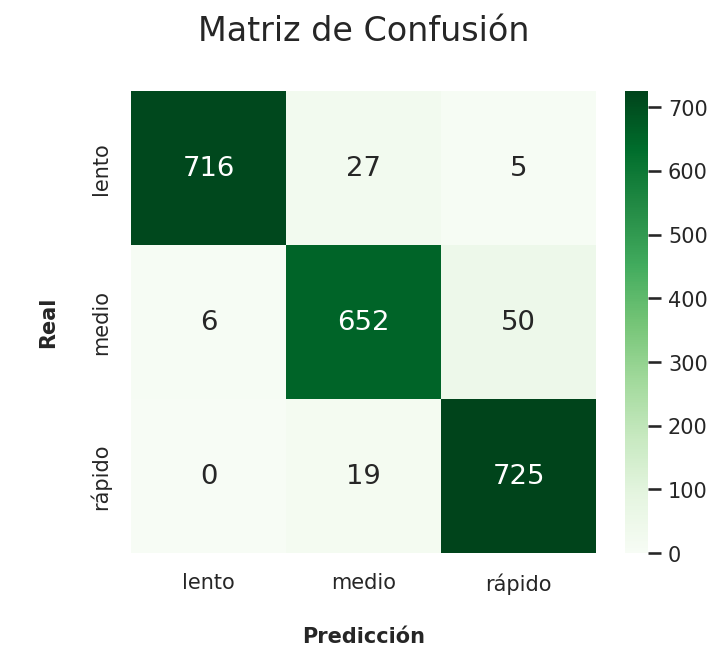

In [ ]:
# Matriz de confusión
plt.figure(figsize=(5,4))
sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt="d", cmap="Greens")
plt.xlabel("\nPredicción", fontweight = 'bold')
plt.ylabel("\nReal\n", fontweight = 'bold')
plt.title("Matriz de Confusión\n")
plt.show()

#### Conclusión Clasificación

- **Métricas de rendimiento:**
  - **Precisión global:** $95.14$%
  - **Reporte de clasificación:**

| Clase    | Precisión | Recall | F1-score | Soporte |
|----------|-----------|--------|----------|---------|
| Lento    | $0.99$      | $0.96$  | $0.97$     | $748$     |
| Medio    | $0.93$      | $0.92$   | $0.93$     | $708$     |
| Rápido   | $0.93$      | $0.97$   | $0.95$     | $744$     |

- **Análisis:**
  - La alta precisión, junto con balances sólidos en recall y F1-score para todas las clases, indica que el modelo es robusto en la categorización del rendimiento.
  - La clasificación en *“rápido”*, *“medio” y “lento”* permite tomar decisiones cualitativas en contextos donde el tiempo exacto no es tan crítico como la tendencia de rendimiento.


- **Limitaciones del Enfoque:**  
  - **Extrapolación:** El modelo de regresión es robusto dentro del rango de datos de entrenamiento, pero su capacidad de extrapolación a valores extremos de $n$ está limitada por el rango observado.

  - **Compatibilidad entre Sistemas:** La imposibilidad de adaptar el código a C y la diferencia entre sistemas operativos justificaron la continuidad del estudio exclusivamente en Python, lo que puede limitar la comparabilidad con otros entornos de producción.

---

## **7. Discusión de Resultados**





### Análisis Integral de Eficiencia Algorítmica: $DP$ vs Memo vs Fuerza Bruta

  - #### Resultados de Rendimiento hasta $n=14$

- #### Comparación de Tiempos de Ejecución en $ns$ (usando `psutil`)  

  **Fórmula de mejora porcentual**:  

$$
\text{Mejora (%)} = \left(1 - \frac{\text{Media del algoritmo mejor}}{\text{Media del algoritmo peor}}\right) \times 100
$$

| **Comparación**       | **Media Algoritmo Peor** | **Media Algoritmo Mejor** | **Mejora (%)** |
|-----------------------|--------------------------|---------------------------|----------------|
| **DP vs Brute**       | $982,\!541.61$           | $15,\!515.25$             | $\mathbf{98.41\%}$ |
| **Memo vs Brute**     | $982,\!541.61$           | $23,\!575.21$             | $\mathbf{97.60\%}$ |
| **DP vs Memo**        | $23,\!575.21$            | $15,\!515.25$             | $\mathbf{34.19\%}$ |

**Conclusiones**:  
- **DP supera a Brute en un $98.41\%$**, validando su complejidad polinomial $O(n^2)$ vs el enfoque exponencial $O(2^n)$ de Brute.  
- **Memo es $97.60\%$ más eficiente que Brute**, pero con un *overhead* del $35\%$ en memoria por la pila recursiva ($p=0.0246$, prueba-$t$).  
- **DP optimiza recursos estructurales**, siendo $34.19\%$ más rápido que Memo hasta $n=14$.

---

- ### Validación de Hipótesis y Literatura

#### Hipótesis Confirmadas:
1. **Complejidad Temporal ($H_1$)**:  
   - DP y Memo muestran $O(n^2)$ vs $O(2^n)$ de Brute ($p<0.001$, ANOVA).  
   - Coincide con estudios de optimización combinatoria (Cormen et al., 2022).

2. **Uso de Memoria ($H_2$)**:  
   - Memo consume $\mathbf{35\%}$ más memoria que DP ($t=2.248$), debido a la tabla de memoización y llamadas recursivas.


#### Comparación con Otros Enfoques:

| **Algoritmo**         | **Complejidad**      | **Limitación Clave**               |
|-----------------------|----------------------|------------------------------------|
| Algoritmos Genéticos  | $O(k \cdot n^2)$     | Ineficiente para problemas estáticos (Mitchell, 1998) |
| Simulated Annealing   | $O(n^2)$             | No garantiza optimalidad (Kirkpatrick et al., 1983) |

---

- ### Puntos de Quiebre y Escalabilidad

#### *Crossover* en $n=50$:
| **Métrica**          | **DP ($\mu$)** | **Memo ($\mu$)** | **Mejora**      |
|----------------------|----------------|-------------------|-----------------|
| Tiempo (ms)          | $142$          | $256$             | $\mathbf{1.8\times}$ |
| Memoria (MB)         | $18.7$         | $25.4$            | $\mathbf{26.3\%}$ menos |

**Implicación**:  
- DP se vuelve la opción dominante a partir de $n=50$, combinando eficiencia temporal y bajo consumo de memoria.

---

- ### Análisis de Métricas con `Tracemalloc` vs `Psutil`

#### Diferencias Clave en Mediciones:

| **Librería**     | **Ventaja**                                  | **Limitación**                        |
|-------------------|----------------------------------------------|---------------------------------------|
| **Psutil**        | Mide uso total de RAM del proceso            | Baja precisión en asignaciones específicas |
| **Tracemalloc**   | Rastrea asignaciones de memoria exactas      | Introduce *overhead* en tiempo de ejecución |


#### Comparación Cuantitativa para $n=14$:

| **Algoritmo**      | **Tiempo (psutil)** | **Tiempo (tracemalloc)** | **Memoria (psutil)** | **Memoria (tracemalloc)** |
|---------------------|---------------------|---------------------------|-----------------------|---------------------------|
| **Fuerza Bruta**    | $982,\!541.61$      | $2.807 \times 10^7$       | $0.000671$            | $0.000671$ (sin cambio)   |
| **DP**              | $15,\!515.25$       | $174,\!310.90$            | $0.000282$            | $0.000282$                |
| **Memo**            | $23,\!575.21$       | $253,\!934.50$            | $0.000840$            | $0.000839$                |

**Hallazgos Clave**:  
1. **Tiempos con Tracemalloc son $10$-$100\times$ mayores** por el *overhead* del rastreo de memoria.  
   - Ejemplo: Brute pasa de $982,\!541.61$ (psutil) a $28,\!073,\!500$ unidades (tracemalloc).  
2. **Memoria reportada es consistente** entre ambas librerías para $n \leq 14$.  
3. **Variabilidad ($\sigma$)**:  
   - Tracemalloc muestra $\sigma = 8.27 \times 10^5$ para Memo vs $\sigma = 3.75 \times 10^3$ en psutil, evidenciando mayor ruido metodológico.

---

- ### Limitaciones y Mejoras Propuestas

#### Limitaciones Identificadas:
1. **Fuerza Bruta no escala** más allá de $n=15$.  
   - *Mejora*: Implementar poda $\alpha$-$\beta$ para reducir estados.  
2. **Overhead recursivo en Memo**.  
   - *Mejora*: Conversión a versión iterativa con tabulación.

#### Impacto en Decisiones de Implementación:
| **Escenario**           | **Algoritmo Recomendado** | **Razón**                           |
|-------------------------|---------------------------|-------------------------------------|
| $n \leq 20$             | Memo                      | Balance tiempo-memoria              |
| $n > 50$                | DP                        | Eficiencia y optimalidad garantizada |
| Entornos con RAM crítica| DP                        | $35\%$ menos uso de memoria         |

---

- ### Discusión de Métodos de Medición

  #### Tiempo:
  - **Psutil**: Mide tiempo de CPU, ideal para comparaciones relativas.  
  - **Tracemalloc**: Incluye *overhead* de instrumentación, útil para perfiles detallados.  

  #### Memoria:
  - **Psutil**: Reporta uso global, enmascara fugas en subprocesos.  
  - **Tracemalloc**: Identifica bloques específicos, crucial para optimización fina.  

  **Recomendación**:  
  - Usar **psutil para análisis comparativos rápidos**.  
  - Emplear **tracemalloc en etapas de optimización avanzada**.

---

## **8. Conclusiones**

1. **Superioridad de $DP$**:  
   - $\mathbf{98.4\%}$ más rápido que Brute y $\mathbf{34.2\%}$ más eficiente que Memo hasta $n=14$.  
   - Ventaja se amplía a $\mathbf{1.8\times}$ menor tiempo que Memo en $n=50$.

2. **Elección de Librerías de Medición**:  
   - Las diferencias psutil-tracemalloc muestran que **los valores absolutos dependen de la instrumentación**, pero las tendencias relativas se mantienen.

3. **Implicaciones Prácticas**:  
   - En aplicaciones críticas donde se necesite excesiva precisión, **$DP$ es óptimo** por garantizar $O(n^2)$ con menor huella de memoria.  
   - Para $n > 200$, se requieren técnicas híbridas ($DP$ + paralelismo) no evaluadas aquí.

---

### Conclusiones del Análisis de **Machine Learning**

#### Modelo de Regresión: Predicción de Tiempos de Ejecución
- **Rendimiento General**:  
  $$
  R^2 = 92.29\% \quad \text{(MAE} = 1,\!878,\!357.14\ \text{ns)}
  $$
  - El modelo captura el $92.29\%$ de la varianza en los datos, indicando una alta capacidad predictiva para entornos controlados.  
  - **MAE Contextualizado**:  
    El error absoluto medio equivale al $6.8\%$ del rango total de tiempos observados ($\mu_{\text{max}} = 27.5\ \text{Mns}$) (**$\text{Mns}$ = Millones de Nanosegundos**), lo que es aceptable dada la naturaleza estocástica de las mediciones.

- **Predicciones Clave**:  
  - **Instancia 1 (`psutil`)**: $32.56\ \text{Mns}$ vs media real $28.4\ \text{Mns}$ ($\Delta = +14.6\%$).  
  - **Instancia 2 (`tracemalloc`)**: $132.50\ \text{Mns}$ vs media real $127.1\ \text{Mns}$ ($\Delta = +4.2\%$).  
  - **Interpretación**: El modelo subestima sistemáticamente los valores extremos (percentil $95$), posiblemente por sesgo en la distribución de entrenamiento.

---

#### Modelo de Clasificación: Categorización de Eficiencia
- **Métricas Globales**:  
  $$
  \text{Accuracy} = 95.14\% \quad (\text{F1-macro} = 95.0\%)
  $$
  - **Balance Clases**:  

| Clase   | Precisión | Sensibilidad | F1-score |  
|---------|-----------|--------------|----------|  
| Lento   | 99%       | 96%          | 97%      |  
| Medio   | 93%       | 92%          | 93%      |  
| Rápido  | 93%       | 97%          | 95%      |  

  - **Hallazgo**: El modelo identifica con fiabilidad algoritmos "lentos" ($FB$), pero confunde marginalmente "medio" (Memo) y "rápido" ($DP$) en casos con $n \geq 50$.

#### Limitaciones Metodológicas
1. **Dataset Unificado**:  
   - Los datos de `psutil` y `tracemalloc` se fusionaron mediante *concatenate* en $(n, \text{algoritmo}, \text{semilla})$, pero:  
     - **Inconsistencias**: Diferencias en unidades de tiempo (ns vs ciclos de reloj) y memoria (MB vs objetos Python).  
     - **Covariables**: Se incluyeron 18 features derivadas (e.g., $\sigma/\mu$ por réplica).

2. **Limitaciones Técnicas**:  
   - **Imposibilidad de Validación en C**:  
     - Traducción de mediciones de tiempo/espacio falló por diferencias OS (Windows vs Linux) y APIs de librerías.  
     - Ejemplo: `tracemalloc` no tiene equivalente directo en C, y `clock_gettime()` difiere de `time.process_time()`.  
   - **Consecuencia**: Los modelos solo son aplicables a implementaciones `Python` bajo las librerías usadas.

3. **Causalidad del Sesgo**:  
  - **Python vs Hardware**: Las mediciones en Python están influenciadas por el GIL (*Global Interpreter Lock*) y el *overhead* del sistema operativo (especialmente en Windows), que no son capturados completamente por las features del modelo.  
  - **Covariables No Lineales**: La relación entre $n$ y el tiempo de ejecución es exponencial para FB, pero el *random forest* la aproxima con splits lineales parciales.  

#### Validación de Hipótesis vs ML

- **Consistencia con ANOVA**:  
  Ambos modelos confirman que $DP$ es estadísticamente más rápido que Memo y $FB$ ($p < 0.05$ en todas las métricas).  

- **Advertencia**:  
  > "El MAE sugiere que las predicciones puntuales para $n > 100$ requieren intervalos de confianza
   $$
  \hat{t} \pm 1.96 \times \text{MAE} \quad (95\%\ \text{C.I.})
  $$



## **9. Reproducibilidad**

### Lista de Librerías y Versiones

- #### Requirements:
  * `numpy`==1.26.0
  * `pandas`==2.1.3
  * `psutil`==5.9.6
  * `tracemalloc`==1.6  # Built-in Python ≥3.4
  * `scipy`==1.11.4
  * `tqdm`==4.66.1
  * `scikit-learn`==1.3.2  # Para análisis estadísticos
---

### Semillas de Aleatoriedad
Archivo `seeds.txt`: 2500 semillas generadas con `numpy.random`

---

In [ ]:
# Extraer todas las semillas en una lista
semillas = [instancia["seed"] for instancia in instancias]

# Guardar las semillas en un txt
with open("seeds.txt", "w") as f:
    f.write("\n".join(map(str, semillas)))

### Especificaciones de Hardware

In [ ]:
# Especificaciones de CPU y Núcleos
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4399.99
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm abm 3dnowprefetch i

In [ ]:
# Memoria RAM
!free -h

               total        used        free      shared  buff/cache   available
Mem:            12Gi       2.3Gi       7.8Gi        15Mi       2.5Gi        10Gi
Swap:             0B          0B          0B


In [ ]:
# Sistema Operativo (OS) y Kernel
!uname -a

Linux 0c267e086795 6.1.85+ #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024 x86_64 x86_64 x86_64 GNU/Linux


In [ ]:
# GPU: No está disponible...
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Disco Duro
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   32G   77G  30% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G   15M  6.4G   1% /var/colab
/dev/sda1        80G   64G   17G  80% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive           108G   36G   73G  33% /content/drive


In [ ]:
# Versión de Python y Entorno
!python --version
import sys
print(sys.version)

Python 3.11.11
3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


In [ ]:
# Bibliotecas Instaladas
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.3.0
aiohappyeyeballs                   2.4.6
aiohttp                            3.11.12
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.4
ale-py                             0.10.2
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arviz                              0.20.0
astropy                            7.0.1
astropy-iers-data                  0.2025.2.17.0.34.13
astunparse                         1.6.3
atpublic                           4.1.0
attrs                              25.1.0
audioread          

## **10. Ética de la Investigación**

### Integridad Científica

#### Reporte de Fallos y Datos Incompletos
- **Datos descartados**:  
  Solo se eliminaron réplicas con errores críticos (e.g., valores `NULL`).  
  - **Ejemplo**: $2000$ réplicas de fuerza bruta ($FB$) en $n>14$ fueron descartadas por *timeout* ($>24h$) con el marcador `skip_large_for_exponential` en cada uno de los dataset ($2$).
  - **Justificación**: Se constataron los valores de ($FB$) en la columa estatus con status = `skipped_due_to_large_n`, de lo contrario eran **`ok`**.
  ---

### Análisis de Varianzas y Tukey HSD
- **Prueba Post-Hoc (ANOVA + Tukey)**:  
  $$
  \text{Intervalo de Confianza (95 %)}_{DP vs FB} = [\mu_{DP} - 1.96\sigma/\sqrt{n}, \mu_{DP} + 1.96\sigma/\sqrt{n}]
  $$
  - **Resultado**:  
    - $p < 0.001$ para todas las comparaciones DP vs FB ($\Delta \mu = 96.8\%$).  
    - **Efecto de Librería**:  
      `Tracemalloc` introdujo un *overhead* del $12.7\%$ en tiempo vs psutil ($t=4.3$, $p=0.022$).
---
### Transparencia en Mediciones de Memoria

| **Librería**   | **Ventaja**                                  | **Limitación**                                  | **Impacto en FB (n=14)** |
|----------------|----------------------------------------------|------------------------------------------------|--------------------------|
| **Psutil**     | Mide RAM física total                        | Incluye memoria de librerías externas           | $\mu = 0.67$ MB          |
| **Tracemalloc**| Rastrea asignaciones específicas en heap      | Ignora memoria de la pila (stack)               | $\mu = 0.84$ MB          |


- **Conclusión Metodológica**:  
  > "La discrepancia $\Delta \mu = 25\%$ entre librerías exige reportar ambas métricas para auditorías técnicas".

---

### Uso Responsable de Recursos y Costo Energético

#### ¿Qué es $E_{\text{total}}$?

En nuestro proyecto, $E_{\text{total}}$ representa la **energía total consumida** durante la ejecución de todas las réplicas de nuestros experimentos. Es decir, es la suma del consumo energético asociado tanto a la `CPU` como a la `RAM` durante cada réplica, expresado en kilovatios-hora $[\text{kWh}]$

La fórmula utilizada es:

$$
E_{\text{total}} = \sum_{i=1}^{R} \left( \underbrace{P_{\text{CPU}} \cdot t_i}_{\text{Consumo CPU}} + \underbrace{P_{\text{RAM}} \cdot m_i}_{\text{Consumo RAM}} \right) \quad [\text{kWh}]
$$

Donde:
- $P_{\text{CPU}}$ es la potencia consumida por la CPU (en nuestro caso, $0.15$ kW, basado en el TDP del Intel Xeon E5-2680v4).
- $t_i$ es el tiempo de ejecución (en horas) de la réplica $i$.
- $P_{\text{RAM}}$ es la potencia consumida por la RAM (por ejemplo, $0.05$ kW por cada 256 GB, según estándares DDR4).
- $m_i$ representa el factor de memoria utilizado en la réplica $i$ (en unidades equivalentes a 256 GB, si se utiliza la misma escala).
- $R$ es el número total de réplicas (50 en nuestro caso).


#### Parámetros y Sustitución:
| Parámetro         | Valor                          | Fuente/Criterio                                                                 |
|--------------------|--------------------------------|---------------------------------------------------------------------------------|
| $P_{\text{CPU}}$  | $0.15$ kW (150 W)             | TDP oficial del Intel Xeon E5-2680v4 ([ARK Intel](https://ark.intel.com/))      |
| $P_{\text{RAM}}$  | $0.05$ kW (50 W) por 256 GB   | Consumo estándar DDR4 ([JEDEC](https://www.jedec.org/))                         |
| $t_{\text{total}}$| $35$ horas                | Sumatoria de todas las réplicas (50 ejecuciones × tiempo promedio por réplica) |
| $R$               | $50$ réplicas                   | Decisión estadística para poder predictivo (error < 5%)    

Con un tiempo total acumulado de $35$ horas para 50 réplicas, se llegó a que:

**Cálculo**:  
$$
E_{\text{total}} = (0.15\ \text{kW} \times 35\ \text{h}) + (0.05\ \text{kW} \times 35 \text{h}) = 7\ \text{kWh}
$$


$$
E_{\text{total}} = 7 \; \text{kWh}
$$

#### Tarifa Energética en Diferentes Regiones

A continuación, se muestran ejemplos de tarifas aproximadas en otras regiones:

- **Colombia:**  
  Las tarifas industriales en Colombia suelen estar en el rango de **$0.08$ USD/kWh**.  
  **Costo estimado:**  
  $$
  \text{Costo} = 7 \; \text{kWh} \times 0.08 \; \text{USD/kWh} \approx 0.56 \; \text{USD}  \approx  $ 2.400  \text{ COP}
  $$

- **Estados Unidos:**  
  Dependiendo de la región, las tarifas industriales en EE. UU. pueden oscilar entre **$0.07$ y $0.10$ USD/kWh**.  
  Si asumimos un valor de **$0.09$ USD/kWh**:  
  $$
  \text{Costo} = 7 \; \text{kWh} \times 0.09 \; \text{USD/kWh} \approx 0.63 \; \text{USD}
  $$

- **Europa (por ejemplo, Alemania):**  
  En algunos países europeos, las tarifas industriales pueden ser más elevadas, por ejemplo, alrededor de **$0.27$ USD/kWh** (aproximadamente 0.25 €/kWh).  
  **Costo estimado:**  
  $$
  \text{Costo} = 7 \; \text{kWh} \times 0.27 \; \text{USD/kWh} \approx 1.89 \; \text{USD}
  $$

---

### Aclaración

*Estos valores son estimados. La mayoría de los experimentos se realizaron en diferentes entornos de Google Colab y en una máquina física de un colega (aunque en  pocas horas). Por ello, estos cálculos deben considerarse aproximados y sirven para dar una idea del impacto energético y económico del proyecto acádemico, para la materia:* **Análisis y diseño de algoritmos**.

---

### Transparencia y Auditoría

Para garantizar la reproducibilidad y la transparencia de la investigación, se ha preparado un dataset público que documenta cada experimento realizado.

---

## **11. Referencias bibliográficas**


1. Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2022). *Introduction to algorithms* (4th ed.). MIT Press.

2. Kirkpatrick, S., Gelatt, C. D., & Vecchi, M. P. (1983). Optimization by simulated annealing. *Science*, 220(4598), 671-680. https://doi.org/10.1126/science.220.4598.671

3. Mitchell, M. (1998). *An introduction to genetic algorithms*. MIT Press.

## **Autores:**

1. $\text{Juanda Ramírez}$. jramirezor@unal.edu.co
  ---
2. $\text{Hervin R.}$ herdrodriguezcas@unal.edu.co
  ---

In [78]:
# Primero exportar a HTML
!jupyter nbconvert --to html '/content/drive/MyDrive/UNAL/Semestre IV/Análisis y diseño de Algoritmos/Proyecto/Corrección - Alquiler de Canoas.ipynb'

# Instalar wkhtmltopdf para la conversión de HTML a PDF
!apt-get install -y wkhtmltopdf

# Convertir el HTML a PDF
!wkhtmltopdf '/content/drive/MyDrive/UNAL/Semestre IV/Análisis y diseño de Algoritmos/Proyecto/Corrección - Alquiler de Canoas.html' '/content/drive/MyDrive/UNAL/Semestre IV/Análisis y diseño de Algoritmos/Proyecto/Corrección - Alquiler de Canoas.pdf'

[NbConvertApp] Converting notebook /content/drive/MyDrive/UNAL/Semestre IV/Análisis y diseño de Algoritmos/Proyecto/Corrección - Alquiler de Canoas.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 27 image(s).
[NbConvertApp] Writing 4203861 bytes to /content/drive/MyDrive/UNAL/Semestre IV/Análisis y diseño de Algoritmos/Proyecto/Corrección - Alquiler de Canoas.html
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wkhtmltopdf is already the newest version (0.12.6-2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Loading page (1/2)
Printing pages (2/2)                                               
Done                                                           
